***
# <font align="center" color=green size=10>Testing Machine Learning Algorithms to identify bird species</font>
***

> *Written by* ***Nelson Buainain*** *&* ***Maura Regina Costa***

* https://github.com/nnbuainain

* https://github.com/Mauregina

# <font color=green>1 The problem</font>
***

### Vocalization data of *Tunchiornis* species

The following dataset contains measurements taken from bird song of a group of Neotropical species belonging to the *Tunchiornis* genus. From every sample (individual vocal recordings) time (s) and frenquency (Hz) characters were taken. Samples were labled a priori according to their genetic group identified in previous studies.

The goal of this project is to:

- identify the number of vocal cluster that exist in the dataset and verify if these groups correspond to the genetic groups.
- try to discriminate genetic groups based on their song.

- test whether the models constructed here perform better than the specialist's hearing capacity. 

- See if this models can be applied to other animals or fuctions. 

<img src='https://raw.githubusercontent.com/Mauregina/CursoMachineLearningINDT/main/image_bird.png' width='30%'>


### Data Source 

Buainain et al. 2021. Multiple species and deep genomic divergences despite little phenotypic diferentiation in an ancient Neotropical songbird, Tunchiornis ochraceiceps. Molecular Phylogenetics and Evolution.

https://www.sciencedirect.com/science/article/abs/pii/S1055790321001391

# <font color=green>2 PRE-PROCESSING THE DATA</font>
***

### Import libraries

In [315]:
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import plotly.graph_objects as go
import plotly.express as px
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from pickle import dump
from sklearn import metrics 
from pprint import pprint
from hpsklearn import HyperoptEstimator
from hpsklearn import any_classifier
from hpsklearn import any_preprocessing
from hyperopt import tpe
from autosklearn.classification import AutoSklearnClassifier
from autosklearn.experimental.askl2 import AutoSklearn2Classifier
# import autosklearn.classification
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import utils
from imblearn.over_sampling import SMOTE


%matplotlib inline

!export OMP_NUM_THREADS=1

## <font color=green>2.1 Coletando os dados</font>
***

### Importing the project's dataset

In [2]:
!mkdir data
!wget -O data/Tunch_vocal_data.csv https://raw.githubusercontent.com/Mauregina/CursoMachineLearningINDT/main/Tunch_vocal_data.csv

--2021-10-19 16:49:45--  https://raw.githubusercontent.com/Mauregina/CursoMachineLearningINDT/main/Tunch_vocal_data.csv
Resolving raw.githubusercontent.com... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35453 (35K) [text/plain]
Saving to: 'data/Tunch_vocal_data.csv'

data/Tunch_vocal_da 100%[===================>]  34.62K  --.-KB/s    in 0.02s   

2021-10-19 16:49:45 (1.84 MB/s) - 'data/Tunch_vocal_data.csv' saved [35453/35453]



In [3]:
dados = pd.read_csv('data/Tunch_vocal_data.csv', sep=';', decimal=',')
dados.head()

study number  File number Collection                  Recorder        Date  \
0             7       275521         XC  Patricio Mena Valenzuela  1999-07-00   
1            12       262350         XC                 Olaf Jahn  04/08/1997   
2            13       262349         XC                 Olaf Jahn  18/08/1999   
3            26        71431         XC               Daniel Lane  25/07/1997   
4            58       242787         XC              Niels Krabbe  24/07/2002   

   Country Department/Province  \
0  Ecuador          Esmeraldas   
1  Ecuador          Esmeraldas   
2  Ecuador          Esmeraldas   
3  Ecuador          Esmeraldas   
4  Ecuador           Pichincha   

                                            Locality  LATITUDE  LONGITUDE  \
0  Playa de Oro, foothill zone ca. 7 km E of vill...      0.87     -78.73   
1  Playa de Oro, foothill zone ca. 7 km E of vill...      0.88     -78.80   
2                       Gualpi de Ónzole, Río Ónzole      0.77     -79.15   
3                                30km SE San Lorenzo      1.09     -78.69   
4                                     Río Guaycuyacu      0.22     -78.89   

   ... maxfreq_song_syllable centerfreq_song_syllable bw90_song_syllable  \
0  ...                3617.6                   3617.6              258.4   
1  ...                3100.8                   3100.8              172.3   
2  ...                3617.6                   3617.6              258.4   
3  ...                2842.4                   2842.4               86.1   
4  ...                3876.0                   3789.8              258.4   

   freq95_song_syllable  freq5_song_syllable  number_of_syllables  \
0                3789.8               3531.4                    1   
1                3186.9               3014.6                    1   
2                3703.7               3445.3                    1   
3                2928.5               2842.4                    1   
4                3962.1               3703.7                    1   

   Modulation_of_first_syllable  Modulation _second_syllable  \
0                           1.0                          NaN   
1                           0.0                          NaN   
2                           1.0                          NaN   
3                          -1.0                          NaN   
4                           1.0                          NaN   

   Modulation _third_syllable  mod_comp_syll  
0                         NaN            1.0  
1                         NaN            0.0  
2                         NaN            1.0  
3                         NaN           -1.0  
4                         NaN            1.0  

[5 rows x 42 columns]

## <font color=green>2.2 Exploring the data</font>
***

In [4]:
dados.shape

(152, 42)

In [5]:
list(dados)

['study number',
 'File number',
 'Collection',
 'Recorder',
 'Date',
 'Country',
 'Department/Province',
 'Locality',
 'LATITUDE',
 'LONGITUDE',
 'Subspecies',
 'Genomic group',
 'Genomic group higher',
 'duration_first_syllable',
 'maxfreq_first_syllable',
 'centerfreq_first_syllable',
 'bw90_first_syllable',
 'freq95_first_syllable',
 'freq5_first_syllable',
 'duration_second_syllable',
 'maxfreq_second_syllable',
 'centerfreq_second_syllable',
 'bw90_second_syllable',
 'freq95_second_syllable',
 'freq5_second_syllable',
 'duration_third_syllable',
 'maxfreq_third_syllable',
 'centerfreq_third_syllable',
 'bw90_third_syllable',
 'freq95_third_syllable',
 'freq5_third_syllable',
 'duration_song_syllable',
 'maxfreq_song_syllable',
 'centerfreq_song_syllable',
 'bw90_song_syllable',
 'freq95_song_syllable',
 'freq5_song_syllable',
 'number_of_syllables',
 'Modulation_of_first_syllable',
 'Modulation _second_syllable',
 'Modulation _third_syllable',
 'mod_comp_syll']

### **Variables used**

> ### Country:
> ***
Country where the sample was obtained.

> ### Locality:
> ***
Country where the sample was obtained.

> ### Genomic group:
> ***
Genomic group (label) of each samples.

> ### duration_song_syllable:
> ***
Song durantion, in seconds.

> ### maxfreq_song_syllable:
> ***
Song's maximum frequencies.

> ### centerfreq_song_syllable:
> ***
Song's central frequencies.

> ### bw90_song_syllable:
> ***
Song's bandwidth frequencies.

> ### freq95_song_syllable:
> ***
Frequency that divides the song in two intervals containing 95% and 5% of the song's energy respectively.

> ### freq5_song_syllable:
> ***
Frequency that divides the song in two intervals containing 5% and 95% of the song's energy respectively.

> ### number_of_syllables:
> ***
Number of syllables in the song.

> ### modulation_comparable_syllable:
> ***
Variation among initial and final frequencies in the song (Ascendant, Descendant ou non-modulated).





### Geographic distritubion of bird song recordings (samples)
<img src='https://raw.githubusercontent.com/Mauregina/CursoMachineLearningINDT/main/sampling_map_vocal_tunch.jpeg' width='70%'>

### Selecting only the variables of interest

In [6]:
dados = dados[['Country',
               'Locality',
               'Genomic group', 
               'duration_song_syllable', 
               'maxfreq_song_syllable',
               'centerfreq_song_syllable',
               'bw90_song_syllable',
               'freq95_song_syllable',
               'freq5_song_syllable',
               'number_of_syllables',
               'mod_comp_syll']]
dados.head()

Country                                           Locality Genomic group  \
0  Ecuador  Playa de Oro, foothill zone ca. 7 km E of vill...           bul   
1  Ecuador  Playa de Oro, foothill zone ca. 7 km E of vill...           bul   
2  Ecuador                       Gualpi de Ónzole, Río Ónzole           bul   
3  Ecuador                                30km SE San Lorenzo           bul   
4  Ecuador                                     Río Guaycuyacu           bul   

   duration_song_syllable  maxfreq_song_syllable  centerfreq_song_syllable  \
0                   0.499                 3617.6                    3617.6   
1                   0.719                 3100.8                    3100.8   
2                   0.722                 3617.6                    3617.6   
3                   0.558                 2842.4                    2842.4   
4                   0.617                 3876.0                    3789.8   

   bw90_song_syllable  freq95_song_syllable  freq5_song_syllable  \
0               258.4                3789.8               3531.4   
1               172.3                3186.9               3014.6   
2               258.4                3703.7               3445.3   
3                86.1                2928.5               2842.4   
4               258.4                3962.1               3703.7   

   number_of_syllables  mod_comp_syll  
0                    1            1.0  
1                    1            0.0  
2                    1            1.0  
3                    1           -1.0  
4                    1            1.0

In [7]:
dados.shape

(152, 11)

## <font color=green>2.3 Processing the data</font>
***

### Normalizando os dados

#### a) Quantitative data

In [43]:
dados_quantitativos = dados[['duration_song_syllable', 
                             'maxfreq_song_syllable',
                             'centerfreq_song_syllable',
                             'bw90_song_syllable',
                             'freq95_song_syllable',
                             'freq5_song_syllable',
                             'number_of_syllables']]

In [44]:
dados_quantitativos.dtypes

duration_song_syllable      float64
maxfreq_song_syllable       float64
centerfreq_song_syllable    float64
bw90_song_syllable          float64
freq95_song_syllable        float64
freq5_song_syllable         float64
number_of_syllables           int64
dtype: object

In [45]:
normalizador = MinMaxScaler()
normalizador.fit(dados_quantitativos)
dados_quantitativos_normalizados = normalizador.transform(dados_quantitativos)

In [46]:
dados_quantitativos_normalizados

array([[0.23878327, 0.57694025, 0.566046  , ..., 0.51721515, 0.62498186,
        0.        ],
       [0.40608365, 0.34616415, 0.3396276 , ..., 0.27584274, 0.37496976,
        0.        ],
       [0.40836502, 0.57694025, 0.566046  , ..., 0.48274482, 0.5833293 ,
        0.        ],
       ...,
       [0.36121673, 0.19228365, 0.18865279, ..., 0.1723917 , 0.1666586 ,
        0.        ],
       [0.41064639, 0.38461195, 0.3773494 , ..., 0.34482344, 0.4166707 ,
        0.        ],
       [0.35589354, 0.5       , 0.4528368 , ..., 0.41376411, 0.49997581,
        0.        ]])

In [47]:
type(dados_quantitativos_normalizados)

numpy.ndarray

Convert **numpyarray** to **dataframe**

In [48]:
dados_quantitativos_normalizados = pd.DataFrame(dados_quantitativos_normalizados, 
                                                columns=['duration_song_syllable', 
                                                         'maxfreq_song_syllable',
                                                         'centerfreq_song_syllable',
                                                         'bw90_song_syllable',
                                                         'freq95_song_syllable',
                                                         'freq5_song_syllable',
                                                         'number_of_syllables'])
dados_quantitativos_normalizados.head()

duration_song_syllable  maxfreq_song_syllable  centerfreq_song_syllable  \
0                0.238783               0.576940                  0.566046   
1                0.406084               0.346164                  0.339628   
2                0.408365               0.576940                  0.566046   
3                0.283650               0.230776                  0.226418   
4                0.328517               0.692328                  0.641490   

   bw90_song_syllable  freq95_song_syllable  freq5_song_syllable  \
0            0.181847              0.517215             0.624982   
1            0.090976              0.275843             0.374970   
2            0.181847              0.482745             0.583329   
3            0.000000              0.172392             0.291665   
4            0.181847              0.586196             0.708335   

   number_of_syllables  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

# <font color=green>3 Creating and testing the models</font>
***

## <font color=green>3.1 Non-supervised algorithms (clusters). Identifying the number of vocal groups in the dataset</font>
***

### Obtaining the optimal number of clusters using the **elbow method**

In [49]:
dados_normalizados = dados_quantitativos_normalizados
dados_normalizados.head()

duration_song_syllable  maxfreq_song_syllable  centerfreq_song_syllable  \
0                0.238783               0.576940                  0.566046   
1                0.406084               0.346164                  0.339628   
2                0.408365               0.576940                  0.566046   
3                0.283650               0.230776                  0.226418   
4                0.328517               0.692328                  0.641490   

   bw90_song_syllable  freq95_song_syllable  freq5_song_syllable  \
0            0.181847              0.517215             0.624982   
1            0.090976              0.275843             0.374970   
2            0.181847              0.482745             0.583329   
3            0.000000              0.172392             0.291665   
4            0.181847              0.586196             0.708335   

   number_of_syllables  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

In [50]:
wcss = []
K = range(1,11)

for k in K:
  kmeansmodel = KMeans(n_clusters=k)
  kmeansmodel.fit(dados_normalizados)
  wcss.append(kmeansmodel.inertia_)

wcss

[32.08987869219457,
 18.950708730452387,
 10.197687747609724,
 8.100330014295835,
 6.807144907040794,
 6.190536622639717,
 5.272690950549355,
 4.766787014177494,
 4.352314098861656,
 3.846066030910679]

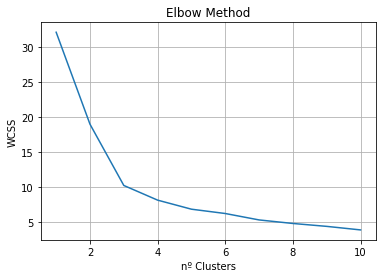

In [51]:
ax = plt.subplot()

ax.plot(K, wcss)
ax.set(xlabel = 'nº Clusters',
       ylabel = 'WCSS',
       title = 'Elbow Method')
ax.grid()

Searching the optimal K value which ideally has both the smalles value of WCSS and number of clusters

In [52]:
x1, y1 = 1, wcss[0]

x2, y2 = 10, wcss[len(wcss)-1]

print(x1, y1)
print(x2, y2)

1 32.08987869219457
10 3.846066030910679


In [53]:
distancias = []
for i in range(len(wcss)):
  x0 = i+2
  y0 = wcss[i]
  numerador = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 * y2*x1)
  denominador = math.sqrt((y2-y1)**2 + (x2-x1)**2)
  distancias.append(numerador/denominador)

distancias

[29.98679640889851,
 33.02321091035899,
 34.72793775657456,
 34.41192508174258,
 33.851755912464036,
 33.08616987131136,
 32.41204312905936,
 31.6128459145604,
 30.78588914090545,
 29.98679640889851]

In [54]:
maior_distancia = max(distancias)
maior_distancia

34.72793775657456

In [55]:
n_cluster_otimo = distancias.index(maior_distancia)+1
n_cluster_otimo

3

### Plotting the graph

In [56]:
kmeansmodel = KMeans(n_clusters=n_cluster_otimo)
kmeansmodel.fit(dados_normalizados)

KMeans(n_clusters=3)

In [57]:
rotulos = kmeansmodel.labels_
rotulos
rotulos_gen = dados['Genomic group']
rotulos_gen.head()

0    bul
1    bul
2    bul
3    bul
4    bul
Name: Genomic group, dtype: object

In [58]:
dados_normalizados['rotulos_kmeans'] = rotulos
dados_normalizados['rotulos_genomic_group'] = dados['Genomic group']


In [59]:
dados_normalizados.head()

duration_song_syllable  maxfreq_song_syllable  centerfreq_song_syllable  \
0                0.238783               0.576940                  0.566046   
1                0.406084               0.346164                  0.339628   
2                0.408365               0.576940                  0.566046   
3                0.283650               0.230776                  0.226418   
4                0.328517               0.692328                  0.641490   

   bw90_song_syllable  freq95_song_syllable  freq5_song_syllable  \
0            0.181847              0.517215             0.624982   
1            0.090976              0.275843             0.374970   
2            0.181847              0.482745             0.583329   
3            0.000000              0.172392             0.291665   
4            0.181847              0.586196             0.708335   

   number_of_syllables  rotulos_kmeans rotulos_genomic_group  
0                  0.0               1                   bul  
1                  0.0               2                   bul  
2                  0.0               1                   bul  
3                  0.0               2                   bul  
4                  0.0               1                   bul

### Testing these three group with different analyses

#### Pairplot

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


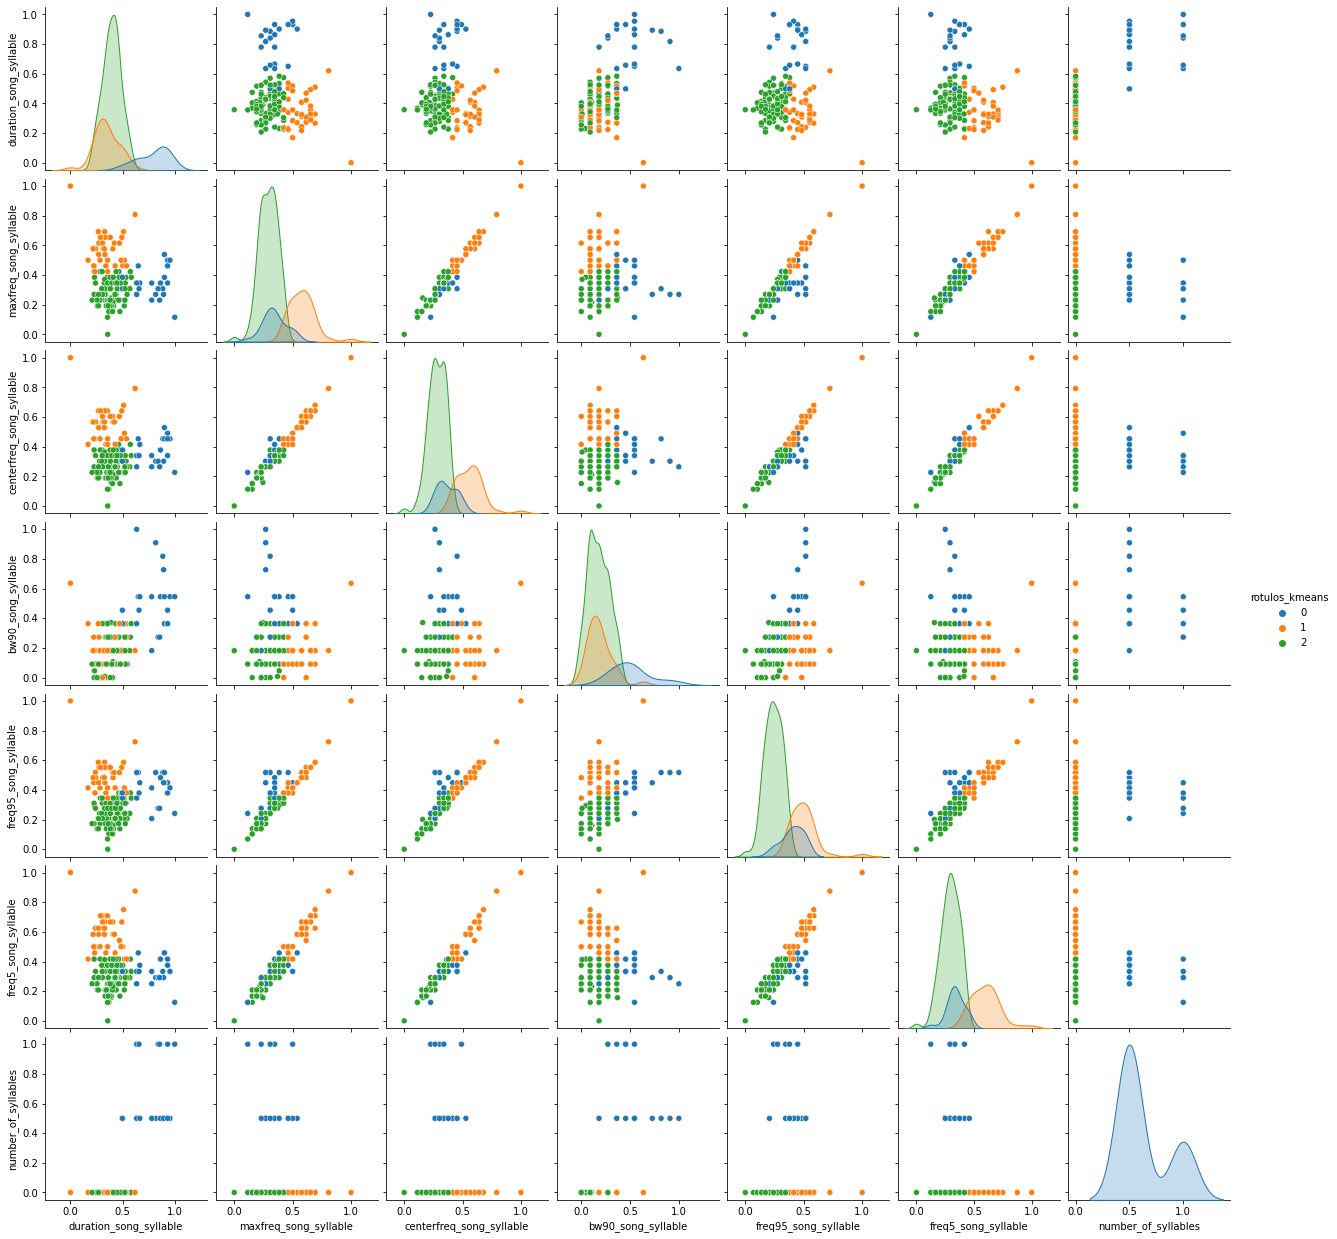

In [61]:
sns.pairplot(dados_normalizados, hue='rotulos_kmeans',palette='tab10')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  wa

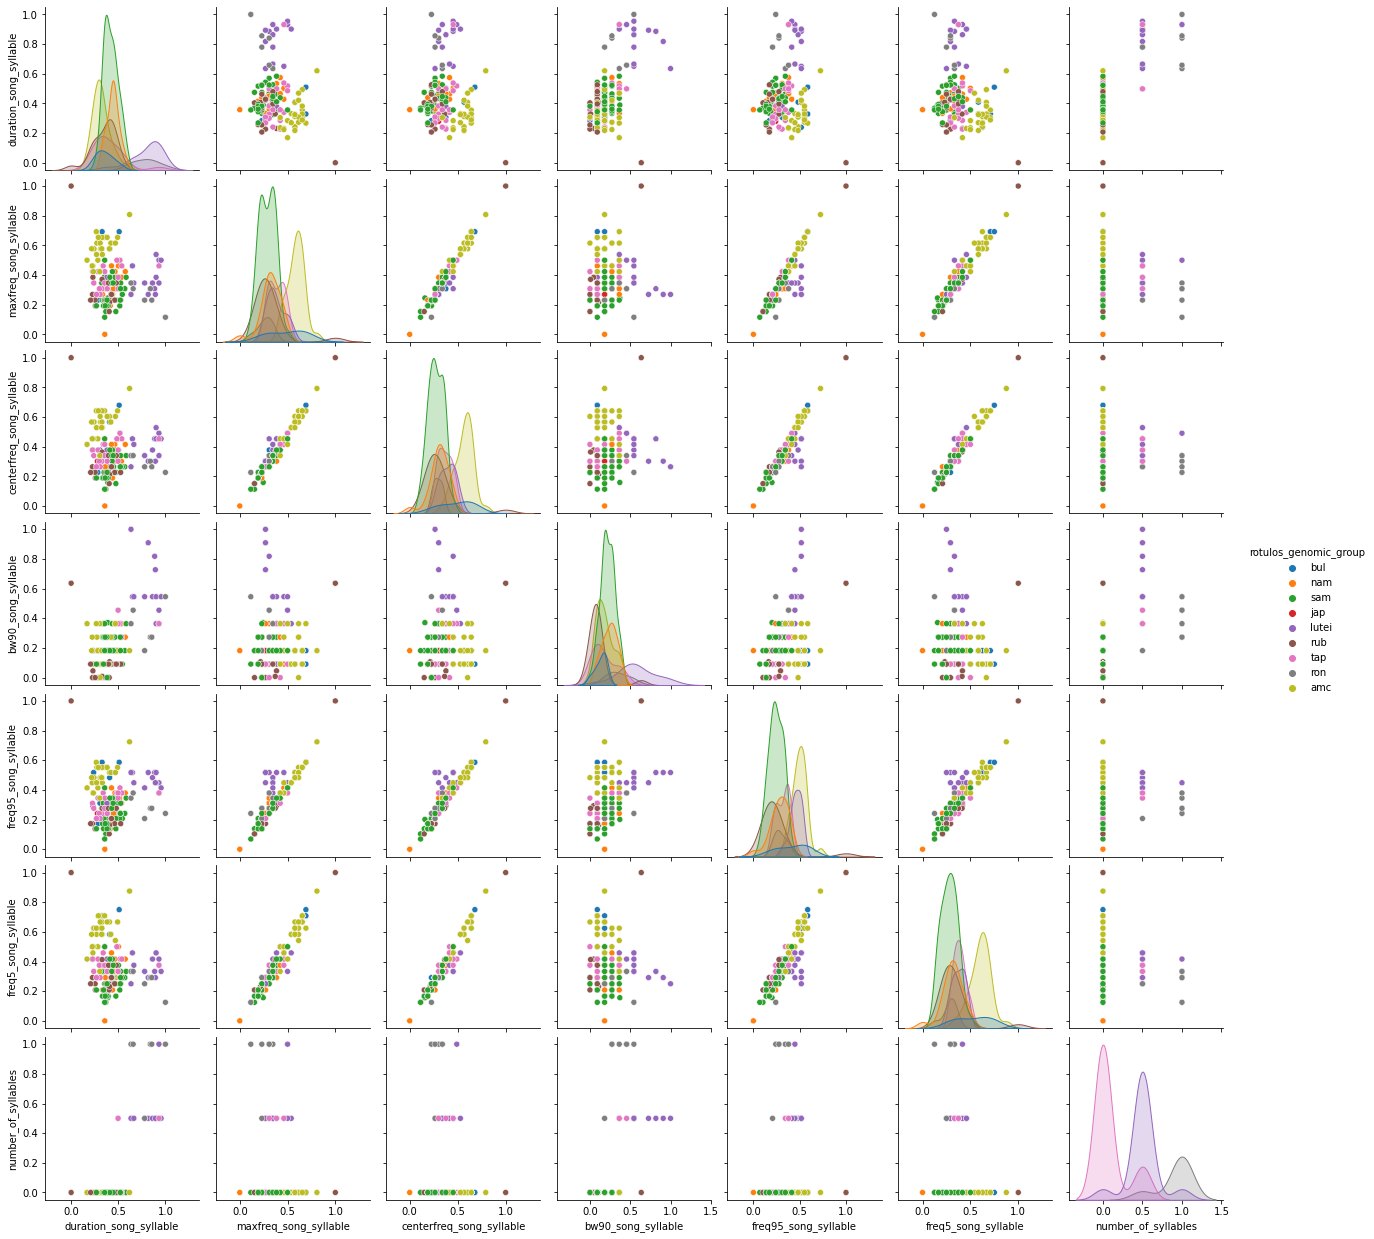

In [62]:
sns.pairplot(dados_normalizados.drop('rotulos_kmeans',axis=1), hue='rotulos_genomic_group',palette='tab10')

#### Match genomic label with K label

In [68]:
for i in range(0, len(dados)):
  print('Grupo Genômico: ', dados.iloc[i, 2], 'Rótulo K-Means: ', dados_normalizados.iloc[i,7])

Grupo Genômico:  bul Rótulo K-Means:  1
Grupo Genômico:  bul Rótulo K-Means:  2
Grupo Genômico:  bul Rótulo K-Means:  1
Grupo Genômico:  bul Rótulo K-Means:  2
Grupo Genômico:  bul Rótulo K-Means:  1
Grupo Genômico:  bul Rótulo K-Means:  1
Grupo Genômico:  bul Rótulo K-Means:  2
Grupo Genômico:  nam Rótulo K-Means:  2
Grupo Genômico:  sam Rótulo K-Means:  2
Grupo Genômico:  sam Rótulo K-Means:  2
Grupo Genômico:  sam Rótulo K-Means:  2
Grupo Genômico:  sam Rótulo K-Means:  2
Grupo Genômico:  nam Rótulo K-Means:  2
Grupo Genômico:  nam Rótulo K-Means:  2
Grupo Genômico:  nam Rótulo K-Means:  2
Grupo Genômico:  nam Rótulo K-Means:  2
Grupo Genômico:  sam Rótulo K-Means:  2
Grupo Genômico:  sam Rótulo K-Means:  2
Grupo Genômico:  nam Rótulo K-Means:  2
Grupo Genômico:  sam Rótulo K-Means:  2
Grupo Genômico:  sam Rótulo K-Means:  2
Grupo Genômico:  jap Rótulo K-Means:  2
Grupo Genômico:  nam Rótulo K-Means:  2
Grupo Genômico:  sam Rótulo K-Means:  2
Grupo Genômico:  sam Rótulo K-Means:  2


#### Coloring a principal component analyses graph with K labels

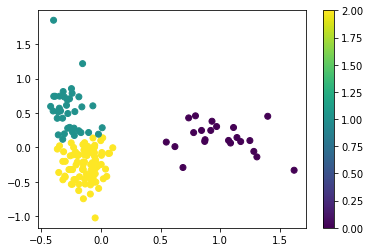

In [69]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(dados_normalizados.drop(['rotulos_kmeans','rotulos_genomic_group'],axis=1))
plt.scatter(proj[:, 0], proj[:, 1], c=rotulos) 
plt.colorbar()

#### Coloring a principal component analyses graph with genomic label

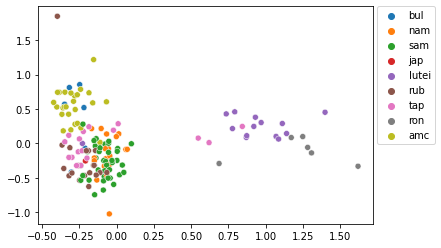

In [71]:
#### Coloring a principal component analyses graph with K labels sklearn.decomposition import PCA
pca = PCA(n_components=3)
proj = pca.fit_transform(dados_normalizados.drop(['rotulos_kmeans','rotulos_genomic_group'],axis=1))
sns.scatterplot(x=proj[:, 0],y=proj[:, 1],hue=rotulos_gen)
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
# plt.scatter(proj[:, 0], proj[:, 1], c=rotulos_gen) 
# plt.colorbar()

In [74]:
dados_normalizados = dados_normalizados.join(pd.DataFrame(proj,columns=['PC1','PC2','PC3']))

In [73]:
pd.DataFrame(proj,columns=['PC1','PC2','PC3'])

PC1       PC2       PC3
0   -0.348553  0.570068 -0.021198
1   -0.195191 -0.105858 -0.103053
2   -0.218536  0.520753 -0.041912
3   -0.302864 -0.415824 -0.176471
4   -0.316515  0.812062 -0.055833
..        ...       ...       ...
147  0.038785 -0.314320  0.138435
148 -0.110702 -0.063928  0.007613
149 -0.056328 -0.503743  0.176870
150 -0.151183  0.041733  0.002970
151 -0.225378  0.280447 -0.011636

[152 rows x 3 columns]

In [75]:
dados_normalizados.head()

duration_song_syllable  maxfreq_song_syllable  centerfreq_song_syllable  \
0                0.238783               0.576940                  0.566046   
1                0.406084               0.346164                  0.339628   
2                0.408365               0.576940                  0.566046   
3                0.283650               0.230776                  0.226418   
4                0.328517               0.692328                  0.641490   

   bw90_song_syllable  freq95_song_syllable  freq5_song_syllable  \
0            0.181847              0.517215             0.624982   
1            0.090976              0.275843             0.374970   
2            0.181847              0.482745             0.583329   
3            0.000000              0.172392             0.291665   
4            0.181847              0.586196             0.708335   

   number_of_syllables  rotulos_kmeans rotulos_genomic_group       PC1  \
0                  0.0               1                   bul -0.246464   
1                  0.0               2                   bul -0.138021   
2                  0.0               1                   bul -0.154528   
3                  0.0               2                   bul -0.214157   
4                  0.0               1                   bul -0.223810   

        PC2       PC3  
0  0.403099 -0.014989  
1 -0.074853 -0.072870  
2  0.368228 -0.029636  
3 -0.294032 -0.124784  
4  0.574215 -0.039480

In [76]:

import plotly.express as px
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=dados_normalizados['PC1'],
                           y=dados_normalizados['PC2'],
                           z=dados_normalizados['PC3'],
                           marker = dict(color=dados_normalizados['rotulos_kmeans'].astype(float)),
                           text = dados_normalizados['rotulos_genomic_group']))

In [77]:
fig = px.scatter_3d(dados_normalizados, x='PC1', y='PC2', z='PC3',
                    color='rotulos_genomic_group', symbol='rotulos_kmeans')
fig.show()

In [83]:
len(rotulos_gen)

152

## <font color=green>3.2 Supervised algorithm (Classification models)</font>
***

### Dividing data in class and attributes

In [84]:
dados = pd.read_csv('data/Tunch_vocal_data.csv', sep=';', decimal=',')
dados.head()

study number  File number Collection                  Recorder        Date  \
0             7       275521         XC  Patricio Mena Valenzuela  1999-07-00   
1            12       262350         XC                 Olaf Jahn  04/08/1997   
2            13       262349         XC                 Olaf Jahn  18/08/1999   
3            26        71431         XC               Daniel Lane  25/07/1997   
4            58       242787         XC              Niels Krabbe  24/07/2002   

   Country Department/Province  \
0  Ecuador          Esmeraldas   
1  Ecuador          Esmeraldas   
2  Ecuador          Esmeraldas   
3  Ecuador          Esmeraldas   
4  Ecuador           Pichincha   

                                            Locality  LATITUDE  LONGITUDE  \
0  Playa de Oro, foothill zone ca. 7 km E of vill...      0.87     -78.73   
1  Playa de Oro, foothill zone ca. 7 km E of vill...      0.88     -78.80   
2                       Gualpi de Ónzole, Río Ónzole      0.77     -79.15   
3                                30km SE San Lorenzo      1.09     -78.69   
4                                     Río Guaycuyacu      0.22     -78.89   

   ... maxfreq_song_syllable centerfreq_song_syllable bw90_song_syllable  \
0  ...                3617.6                   3617.6              258.4   
1  ...                3100.8                   3100.8              172.3   
2  ...                3617.6                   3617.6              258.4   
3  ...                2842.4                   2842.4               86.1   
4  ...                3876.0                   3789.8              258.4   

   freq95_song_syllable  freq5_song_syllable  number_of_syllables  \
0                3789.8               3531.4                    1   
1                3186.9               3014.6                    1   
2                3703.7               3445.3                    1   
3                2928.5               2842.4                    1   
4                3962.1               3703.7                    1   

   Modulation_of_first_syllable  Modulation _second_syllable  \
0                           1.0                          NaN   
1                           0.0                          NaN   
2                           1.0                          NaN   
3                          -1.0                          NaN   
4                           1.0                          NaN   

   Modulation _third_syllable  mod_comp_syll  
0                         NaN            1.0  
1                         NaN            0.0  
2                         NaN            1.0  
3                         NaN           -1.0  
4                         NaN            1.0  

[5 rows x 42 columns]

In [85]:
dados_atributos = pd.DataFrame(dados_normalizados[['duration_song_syllable','maxfreq_song_syllable','centerfreq_song_syllable','bw90_song_syllable','freq95_song_syllable','freq5_song_syllable','number_of_syllables']])
dados_atributos.head()

duration_song_syllable  maxfreq_song_syllable  centerfreq_song_syllable  \
0                0.238783               0.576940                  0.566046   
1                0.406084               0.346164                  0.339628   
2                0.408365               0.576940                  0.566046   
3                0.283650               0.230776                  0.226418   
4                0.328517               0.692328                  0.641490   

   bw90_song_syllable  freq95_song_syllable  freq5_song_syllable  \
0            0.181847              0.517215             0.624982   
1            0.090976              0.275843             0.374970   
2            0.181847              0.482745             0.583329   
3            0.000000              0.172392             0.291665   
4            0.181847              0.586196             0.708335   

   number_of_syllables  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

In [86]:
dados_classes = pd.DataFrame(dados[['Genomic group']])
dados_classes

Genomic group
0             bul
1             bul
2             bul
3             bul
4             bul
..            ...
147           sam
148           sam
149           sam
150           sam
151           sam

[152 rows x 1 columns]

### Divide data in test and train

In [87]:
atributos_treino, atributos_teste, classes_treino, classes_teste = train_test_split(dados_atributos, dados_classes, test_size = 0.4)

### Training a Random Forest model

In [93]:
clf_rf = RandomForestClassifier(n_estimators=1000)
modelo_treino_rf = clf_rf.fit(atributos_treino, np.ravel(classes_treino))
modelo_teste_rf = clf_rf.predict(atributos_teste)

#### Compare classification with labels

In [94]:
rows = []
for i in range(0, len(classes_teste)):
  rows.append([classes_teste.index[i],classes_teste['Genomic group'].values[i],modelo_teste_rf[i]])
classification_rf = pd.DataFrame(data=rows,columns=['study_number','test_label','predic_label'])
classification_rf

study_number test_label predic_label
0            130        amc          amc
1            117        amc          tap
2             94        tap          nam
3             22        nam          sam
4             80        rub          tap
..           ...        ...          ...
56            14        nam          sam
57            25        nam          sam
58            11        sam          sam
59           102        tap        lutei
60           127        amc          nam

[61 rows x 3 columns]

##### Showing samples that were misclassified

In [95]:
classification_rf[classification_rf['test_label'] != classification_rf['predic_label']]

study_number test_label predic_label
1            117        amc          tap
2             94        tap          nam
3             22        nam          sam
4             80        rub          tap
11            75        rub          tap
17           101        tap        lutei
19            74        tap          nam
20            98        tap          nam
22           151        sam          amc
23            78        rub          bul
25            17        sam          nam
26            32        nam          sam
29            28        nam          sam
30            89        rub          sam
32           136        rub          bul
35           138        rub          bul
36            15        nam          sam
37            18        nam          sam
38           106        ron        lutei
40            12        nam          sam
47            82        tap          sam
49             5        bul          amc
50            93        tap          bul
52            79        rub          sam
54            13        nam          sam
55            77        tap          amc
56            14        nam          sam
57            25        nam          sam
59           102        tap        lutei
60           127        amc          nam

#### Showing samples that were classified correctly

In [97]:
classification_rf[classification_rf['test_label'] == classification_rf['predic_label']]

study_number test_label predic_label
0            130        amc          amc
5             67      lutei        lutei
6             95        rub          rub
7            111        amc          amc
8             92        rub          rub
9            132        amc          amc
10            63      lutei        lutei
12           147        sam          sam
13            53        sam          sam
14           124        amc          amc
15            60      lutei        lutei
16           110        amc          amc
18           105        ron          ron
21           135        rub          rub
24            42        sam          sam
27            52        sam          sam
28           145        sam          sam
31            62      lutei        lutei
33            33        sam          sam
34           121        amc          amc
39           129        amc          amc
41           149        sam          sam
42            47        sam          sam
43           142        sam          sam
44            84        rub          rub
45           118        amc          amc
46            54        sam          sam
48           100        ron          ron
51            76        rub          rub
53           125        amc          amc
58            11        sam          sam

#### Accuracy metrics per group

In [92]:

print(classification_report(classes_teste,modelo_teste_rf,zero_division=0))

              precision    recall  f1-score   support

         amc       0.75      0.82      0.78        11
         bul       0.00      0.00      0.00         1
       lutei       0.57      1.00      0.73         4
         nam       0.00      0.00      0.00         9
         ron       1.00      0.67      0.80         3
         rub       1.00      0.42      0.59        12
         sam       0.48      0.85      0.61        13
         tap       0.00      0.00      0.00         8

    accuracy                           0.51        61
   macro avg       0.47      0.47      0.44        61
weighted avg       0.52      0.51      0.47        61



#### Save model

In [108]:
!mkdir models
dump(modelo_treino_rf, open('models/randomforest_8_gengroup.pkl', 'wb'))

### Training a decision tree model

In [109]:
clf_dt = DecisionTreeClassifier()
modelo_treino_dt = clf_dt.fit(atributos_treino, classes_treino)

modelo_teste_dt = modelo_treino_dt.predict(atributos_teste)

In [110]:
rows = []
for i in range(0, len(classes_teste)):
  rows.append([classes_teste.index[i],classes_teste['Genomic group'].values[i],modelo_teste_dt[i]])
classification_dt = pd.DataFrame(data=rows,columns=['study_number','test_label','predic_label'])
classification_dt

study_number test_label predic_label
0            130        amc          amc
1            117        amc          tap
2             94        tap          tap
3             22        nam          sam
4             80        rub          bul
..           ...        ...          ...
56            14        nam          sam
57            25        nam          rub
58            11        sam          sam
59           102        tap        lutei
60           127        amc          nam

[61 rows x 3 columns]

##### showing samples that were wrongly classified

In [112]:
classification_dt[classification_dt['test_label'] != classification_dt['predic_label']]

study_number test_label predic_label
1            117        amc          tap
3             22        nam          sam
4             80        rub          bul
7            111        amc          bul
9            132        amc          bul
10            63      lutei          nam
11            75        rub          tap
14           124        amc          bul
16           110        amc          bul
17           101        tap          nam
19            74        tap          nam
20            98        tap          nam
22           151        sam          nam
23            78        rub          bul
25            17        sam          nam
26            32        nam          sam
29            28        nam          sam
32           136        rub          nam
34           121        amc          bul
35           138        rub          bul
36            15        nam          sam
38           106        ron        lutei
40            12        nam          sam
45           118        amc          bul
47            82        tap          bul
48           100        ron          tap
49             5        bul          amc
50            93        tap          bul
53           125        amc          bul
54            13        nam          sam
55            77        tap          rub
56            14        nam          sam
57            25        nam          rub
59           102        tap        lutei
60           127        amc          nam

##### Showing samples that were classified right

In [114]:
classification_dt[classification_dt['test_label'] == classification_dt['predic_label']]

study_number test_label predic_label
0            130        amc          amc
2             94        tap          tap
5             67      lutei        lutei
6             95        rub          rub
8             92        rub          rub
12           147        sam          sam
13            53        sam          sam
15            60      lutei        lutei
18           105        ron          ron
21           135        rub          rub
24            42        sam          sam
27            52        sam          sam
28           145        sam          sam
30            89        rub          rub
31            62      lutei        lutei
33            33        sam          sam
37            18        nam          nam
39           129        amc          amc
41           149        sam          sam
42            47        sam          sam
43           142        sam          sam
44            84        rub          rub
46            54        sam          sam
51            76        rub          rub
52            79        rub          rub
58            11        sam          sam

#### Accuracy metrics per group

In [115]:
print(classification_report(classes_teste,modelo_teste_dt,zero_division=0))

              precision    recall  f1-score   support

         amc       0.67      0.18      0.29        11
         bul       0.00      0.00      0.00         1
       lutei       0.60      0.75      0.67         4
         nam       0.11      0.11      0.11         9
         ron       1.00      0.33      0.50         3
         rub       0.78      0.58      0.67        12
         sam       0.61      0.85      0.71        13
         tap       0.25      0.12      0.17         8

    accuracy                           0.43        61
   macro avg       0.50      0.37      0.39        61
weighted avg       0.54      0.43      0.44        61



In [141]:
dump(modelo_treino_dt, open('models/decisiontree_8_gengroup.pkl', 'wb'))

### Verificando a acurácia dos modelos

In [116]:
metrics.accuracy_score(classes_teste, modelo_teste_rf)

0.5081967213114754

In [117]:
metrics.accuracy_score(classes_teste, modelo_teste_dt)

0.4262295081967213

> **We can see that the accuracy of the model was not very good. However, this genomic classification is very refined and some of the genomic groups may be too recent to have evolved differentiation in their songs. Let's try to lump some of these groups in a higher hierarchical classification, that is, "older" evolutionary groups. It would be like instead of trying to differentiate three macaw species and three parrot species we will only try to differentiate macaws from parrots.**

# <font color=green>4 Classifying genomic groups with higher hierarquical categories</font>

## <font color=green>4.1 Classification models</font>

### Spliting data in class and attributes

In [118]:
dados_normalizados.head()

duration_song_syllable  maxfreq_song_syllable  centerfreq_song_syllable  \
0                0.238783               0.576940                  0.566046   
1                0.406084               0.346164                  0.339628   
2                0.408365               0.576940                  0.566046   
3                0.283650               0.230776                  0.226418   
4                0.328517               0.692328                  0.641490   

   bw90_song_syllable  freq95_song_syllable  freq5_song_syllable  \
0            0.181847              0.517215             0.624982   
1            0.090976              0.275843             0.374970   
2            0.181847              0.482745             0.583329   
3            0.000000              0.172392             0.291665   
4            0.181847              0.586196             0.708335   

   number_of_syllables  rotulos_kmeans rotulos_genomic_group       PC1  \
0                  0.0               1                   bul -0.246464   
1                  0.0               2                   bul -0.138021   
2                  0.0               1                   bul -0.154528   
3                  0.0               2                   bul -0.214157   
4                  0.0               1                   bul -0.223810   

        PC2       PC3  
0  0.403099 -0.014989  
1 -0.074853 -0.072870  
2  0.368228 -0.029636  
3 -0.294032 -0.124784  
4  0.574215 -0.039480

In [119]:
dados.head()

study number  File number Collection                  Recorder        Date  \
0             7       275521         XC  Patricio Mena Valenzuela  1999-07-00   
1            12       262350         XC                 Olaf Jahn  04/08/1997   
2            13       262349         XC                 Olaf Jahn  18/08/1999   
3            26        71431         XC               Daniel Lane  25/07/1997   
4            58       242787         XC              Niels Krabbe  24/07/2002   

   Country Department/Province  \
0  Ecuador          Esmeraldas   
1  Ecuador          Esmeraldas   
2  Ecuador          Esmeraldas   
3  Ecuador          Esmeraldas   
4  Ecuador           Pichincha   

                                            Locality  LATITUDE  LONGITUDE  \
0  Playa de Oro, foothill zone ca. 7 km E of vill...      0.87     -78.73   
1  Playa de Oro, foothill zone ca. 7 km E of vill...      0.88     -78.80   
2                       Gualpi de Ónzole, Río Ónzole      0.77     -79.15   
3                                30km SE San Lorenzo      1.09     -78.69   
4                                     Río Guaycuyacu      0.22     -78.89   

   ... maxfreq_song_syllable centerfreq_song_syllable bw90_song_syllable  \
0  ...                3617.6                   3617.6              258.4   
1  ...                3100.8                   3100.8              172.3   
2  ...                3617.6                   3617.6              258.4   
3  ...                2842.4                   2842.4               86.1   
4  ...                3876.0                   3789.8              258.4   

   freq95_song_syllable  freq5_song_syllable  number_of_syllables  \
0                3789.8               3531.4                    1   
1                3186.9               3014.6                    1   
2                3703.7               3445.3                    1   
3                2928.5               2842.4                    1   
4                3962.1               3703.7                    1   

   Modulation_of_first_syllable  Modulation _second_syllable  \
0                           1.0                          NaN   
1                           0.0                          NaN   
2                           1.0                          NaN   
3                          -1.0                          NaN   
4                           1.0                          NaN   

   Modulation _third_syllable  mod_comp_syll  
0                         NaN            1.0  
1                         NaN            0.0  
2                         NaN            1.0  
3                         NaN           -1.0  
4                         NaN            1.0  

[5 rows x 42 columns]

### Spliting data in test and training

In [122]:
dados_atributos = pd.DataFrame(dados_normalizados[['duration_song_syllable','maxfreq_song_syllable','centerfreq_song_syllable','bw90_song_syllable','freq95_song_syllable','freq5_song_syllable','number_of_syllables']])
dados_atributos.head()

duration_song_syllable  maxfreq_song_syllable  centerfreq_song_syllable  \
0                0.238783               0.576940                  0.566046   
1                0.406084               0.346164                  0.339628   
2                0.408365               0.576940                  0.566046   
3                0.283650               0.230776                  0.226418   
4                0.328517               0.692328                  0.641490   

   bw90_song_syllable  freq95_song_syllable  freq5_song_syllable  \
0            0.181847              0.517215             0.624982   
1            0.090976              0.275843             0.374970   
2            0.181847              0.482745             0.583329   
3            0.000000              0.172392             0.291665   
4            0.181847              0.586196             0.708335   

   number_of_syllables  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

In [123]:
dados_classes = pd.DataFrame(dados[['Genomic group higher']])
dados_classes

Genomic group higher
0                amc_bul
1                amc_bul
2                amc_bul
3                amc_bul
4                amc_bul
..                   ...
147          jap_nam_sam
148          jap_nam_sam
149          jap_nam_sam
150          jap_nam_sam
151          jap_nam_sam

[152 rows x 1 columns]

In [124]:
atributos_treino, atributos_teste, classes_treino, classes_teste = train_test_split(dados_atributos, dados_classes, test_size = 0.40)

### Training Random Forest model

In [125]:
clf_rf = RandomForestClassifier(n_estimators=1000)
modelo_treino_rf = clf_rf.fit(atributos_treino, np.ravel(classes_treino))
modelo_teste_rf = clf_rf.predict(atributos_teste)

In [126]:
rows = []
for i in range(0, len(classes_teste)):
  rows.append([classes_teste.index[i],classes_teste['Genomic group higher'].values[i],modelo_teste_rf[i]])
classification_rf = pd.DataFrame(data=rows,columns=['study_number','test_label','predic_label'])
classification_rf

study_number   test_label predic_label
0            142  jap_nam_sam  jap_nam_sam
1             92      rub_tap      rub_tap
2             85      rub_tap      rub_tap
3             79      rub_tap  jap_nam_sam
4             94      rub_tap  jap_nam_sam
..           ...          ...          ...
56            82      rub_tap  jap_nam_sam
57            95      rub_tap      rub_tap
58            75      rub_tap      rub_tap
59            96      rub_tap      rub_tap
60           116      amc_bul      amc_bul

[61 rows x 3 columns]

##### Showing samples that were wrongly classified

In [129]:
classification_rf[classification_rf['test_label'] != classification_rf['predic_label']]

study_number   test_label predic_label
3             79      rub_tap  jap_nam_sam
4             94      rub_tap  jap_nam_sam
6             36  jap_nam_sam      rub_tap
9            101      rub_tap  jap_nam_sam
16            91      rub_tap  jap_nam_sam
18            81      rub_tap      amc_bul
21            73      rub_tap      amc_bul
25            74      rub_tap  jap_nam_sam
27            70      rub_tap  jap_nam_sam
28             3      amc_bul      rub_tap
32            86      rub_tap  jap_nam_sam
33           106          ron        lutei
38            99      rub_tap  jap_nam_sam
41           103          ron        lutei
52             1      amc_bul      rub_tap
56            82      rub_tap  jap_nam_sam

#### Showing samples that were classified right

In [131]:
classification_rf[classification_rf['test_label'] == classification_rf['predic_label']]

study_number   test_label predic_label
0            142  jap_nam_sam  jap_nam_sam
1             92      rub_tap      rub_tap
2             85      rub_tap      rub_tap
5             30  jap_nam_sam  jap_nam_sam
7            100          ron          ron
8             71      rub_tap      rub_tap
10           104          ron          ron
11           119      amc_bul      amc_bul
12            15  jap_nam_sam  jap_nam_sam
13           110      amc_bul      amc_bul
14           130      amc_bul      amc_bul
15            52  jap_nam_sam  jap_nam_sam
17            16  jap_nam_sam  jap_nam_sam
19            59        lutei        lutei
20           121      amc_bul      amc_bul
22           115      amc_bul      amc_bul
23            17  jap_nam_sam  jap_nam_sam
24            38  jap_nam_sam  jap_nam_sam
26            23  jap_nam_sam  jap_nam_sam
29            35  jap_nam_sam  jap_nam_sam
30            44  jap_nam_sam  jap_nam_sam
31           141  jap_nam_sam  jap_nam_sam
34            80      rub_tap      rub_tap
35             0      amc_bul      amc_bul
36             7  jap_nam_sam  jap_nam_sam
37            61        lutei        lutei
39           144  jap_nam_sam  jap_nam_sam
40            93      rub_tap      rub_tap
42           133      amc_bul      amc_bul
43            33  jap_nam_sam  jap_nam_sam
44           149  jap_nam_sam  jap_nam_sam
45           143  jap_nam_sam  jap_nam_sam
46            63        lutei        lutei
47            67        lutei        lutei
48           145  jap_nam_sam  jap_nam_sam
49           150  jap_nam_sam  jap_nam_sam
50            89      rub_tap      rub_tap
51           139  jap_nam_sam  jap_nam_sam
53           135      rub_tap      rub_tap
54            10  jap_nam_sam  jap_nam_sam
55            49  jap_nam_sam  jap_nam_sam
57            95      rub_tap      rub_tap
58            75      rub_tap      rub_tap
59            96      rub_tap      rub_tap
60           116      amc_bul      amc_bul

#### Accuracy metric per group

In [132]:
print(classification_report(classes_teste,modelo_teste_rf,zero_division=0))

              precision    recall  f1-score   support

     amc_bul       0.80      0.80      0.80        10
 jap_nam_sam       0.70      0.95      0.81        22
       lutei       0.67      1.00      0.80         4
         ron       1.00      0.50      0.67         4
     rub_tap       0.77      0.48      0.59        21

    accuracy                           0.74        61
   macro avg       0.79      0.75      0.73        61
weighted avg       0.76      0.74      0.72        61



#### Perfoming cross validation test

> We'll start re-sampling the dataset with cross validations to have a better evaluation of our models

> I have extensively tested different values for cv and 4 and 5 seem to be giving the higher accuracy metrics

In [133]:
accuracy = cross_val_score(clf_rf,dados_atributos,np.ravel(dados_classes),cv=4)

In [134]:
accuracy

array([0.78947368, 0.73684211, 0.92105263, 0.68421053])

In [135]:
accuracy.mean()

0.7828947368421052

#### Performing cross validation with shuffle split

In [139]:
cv = ShuffleSplit(n_splits=5)
accuracy = cross_val_score(clf_rf,dados_atributos,np.ravel(dados_classes),cv=cv)

In [140]:
accuracy
print(accuracy.mean())

0.8125


>** This is actually already pretty good and performed better than the specialist (myself) **

>** Some of these groups are not distinguishable by hearing **

#### Save model

In [143]:
dump(modelo_treino_rf, open('models/randomforest_higher_class.pkl', 'wb'))

#### Model tuning 

> One of the ways to improve the model is to adjust some of its parameters to give better results, we'll do that now with **GridSearchCV**

In [152]:
n_estimators=[10,50,100,200,500,1000]
max_features = ['auto','sqrt']
max_depth = [1,10,50,100,1000]

In [153]:
random_grid={'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth 
            }

In [154]:
rf_grid = GridSearchCV(clf_rf, random_grid,  refit=True, verbose=2)

This may take a while

In [155]:
rf_grid.fit(dados_atributos,np.ravel(dados_classes))
pprint(rf_grid.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ....max_depth=1, max_features=auto, n_estimators=10; total time=   0.0s
[CV] END ....max_depth=1, max_features=auto, n_estimators=10; total time=   0.0s
[CV] END ....max_depth=1, max_features=auto, n_estimators=10; total time=   0.0s
[CV] END ....max_depth=1, max_features=auto, n_estimators=10; total time=   0.0s
[CV] END ....max_depth=1, max_features=auto, n_estimators=10; total time=   0.0s
[CV] END ....max_depth=1, max_features=auto, n_estimators=50; total time=   0.1s
[CV] END ....max_depth=1, max_features=auto, n_estimators=50; total time=   0.1s
[CV] END ....max_depth=1, max_features=auto, n_estimators=50; total time=   0.1s
[CV] END ....max_depth=1, max_features=auto, n_estimators=50; total time=   0.1s
[CV] END ....max_depth=1, max_features=auto, n_estimators=50; total time=   0.1s
[CV] END ...max_depth=1, max_features=auto, n_estimators=100; total time=   0.2s
[CV] END ...max_depth=1, max_features=auto, n_e

[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=   0.5s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=   0.5s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=   0.6s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=   1.5s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=   0.8s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=500; total time=   2.2s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=500; total time=   1.2s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=500; total time=   1.2s
[CV] END ..max_depth=10, max

[CV] END .max_depth=100, max_features=auto, n_estimators=500; total time=   1.2s
[CV] END .max_depth=100, max_features=auto, n_estimators=500; total time=   1.2s
[CV] END max_depth=100, max_features=auto, n_estimators=1000; total time=   2.3s
[CV] END max_depth=100, max_features=auto, n_estimators=1000; total time=   2.3s
[CV] END max_depth=100, max_features=auto, n_estimators=1000; total time=   2.4s
[CV] END max_depth=100, max_features=auto, n_estimators=1000; total time=   2.5s
[CV] END max_depth=100, max_features=auto, n_estimators=1000; total time=   2.4s
[CV] END ..max_depth=100, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END ..max_depth=100, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END ..max_depth=100, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END ..max_depth=100, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END ..max_depth=100, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END ..max_depth=100, ma

In [156]:
clf_rf =  RandomForestClassifier(max_depth=50, 
                                max_features='sqrt', 
                                n_estimators=100)
rf_otimizado = clf_rf.fit(atributos_treino, 
                                np.ravel(classes_treino)
                                )
accuracy = cross_val_score(clf_rf,dados_atributos,np.ravel(dados_classes),cv=4)

In [157]:
accuracy.mean()

0.7960526315789473

> We can see that tuning the model did not improve the accuracy which means that we either have to experiment other values and parameters or that the algorithm has reached its best solution with this dataset. We'll try other algorithms before we insist in tunning

### Training a Decision Tree model

In [158]:
clf_dt = DecisionTreeClassifier()
modelo_treino_dt = clf_dt.fit(atributos_treino, classes_treino)

modelo_teste_dt = modelo_treino_dt.predict(atributos_teste)

#### Making a table with true labels and predicted label values

In [159]:
rows = []
for i in range(0, len(classes_teste)):
  rows.append([classes_teste.index[i],classes_teste['Genomic group higher'].values[i],modelo_teste_dt[i]])
classification_df = pd.DataFrame(data=rows,columns=['study_number','test_label','predic_label'])
classification_df

study_number   test_label predic_label
0            142  jap_nam_sam  jap_nam_sam
1             92      rub_tap      rub_tap
2             85      rub_tap      rub_tap
3             79      rub_tap  jap_nam_sam
4             94      rub_tap  jap_nam_sam
..           ...          ...          ...
56            82      rub_tap      amc_bul
57            95      rub_tap  jap_nam_sam
58            75      rub_tap      rub_tap
59            96      rub_tap      rub_tap
60           116      amc_bul      amc_bul

[61 rows x 3 columns]

##### Showing samples that were classified wrong

In [160]:
classification_df[classification_df['test_label'] != classification_df['predic_label']]

study_number test_label predic_label
3             79    rub_tap  jap_nam_sam
4             94    rub_tap  jap_nam_sam
7            100        ron        lutei
9            101    rub_tap        lutei
16            91    rub_tap  jap_nam_sam
18            81    rub_tap      amc_bul
21            73    rub_tap        lutei
25            74    rub_tap  jap_nam_sam
27            70    rub_tap  jap_nam_sam
28             3    amc_bul      rub_tap
32            86    rub_tap  jap_nam_sam
38            99    rub_tap        lutei
52             1    amc_bul      rub_tap
56            82    rub_tap      amc_bul
57            95    rub_tap  jap_nam_sam

#### Showing samples that were classified right

In [161]:
classification_df[classification_df['test_label'] == classification_df['predic_label']]

study_number   test_label predic_label
0            142  jap_nam_sam  jap_nam_sam
1             92      rub_tap      rub_tap
2             85      rub_tap      rub_tap
5             30  jap_nam_sam  jap_nam_sam
6             36  jap_nam_sam  jap_nam_sam
8             71      rub_tap      rub_tap
10           104          ron          ron
11           119      amc_bul      amc_bul
12            15  jap_nam_sam  jap_nam_sam
13           110      amc_bul      amc_bul
14           130      amc_bul      amc_bul
15            52  jap_nam_sam  jap_nam_sam
17            16  jap_nam_sam  jap_nam_sam
19            59        lutei        lutei
20           121      amc_bul      amc_bul
22           115      amc_bul      amc_bul
23            17  jap_nam_sam  jap_nam_sam
24            38  jap_nam_sam  jap_nam_sam
26            23  jap_nam_sam  jap_nam_sam
29            35  jap_nam_sam  jap_nam_sam
30            44  jap_nam_sam  jap_nam_sam
31           141  jap_nam_sam  jap_nam_sam
33           106          ron          ron
34            80      rub_tap      rub_tap
35             0      amc_bul      amc_bul
36             7  jap_nam_sam  jap_nam_sam
37            61        lutei        lutei
39           144  jap_nam_sam  jap_nam_sam
40            93      rub_tap      rub_tap
41           103          ron          ron
42           133      amc_bul      amc_bul
43            33  jap_nam_sam  jap_nam_sam
44           149  jap_nam_sam  jap_nam_sam
45           143  jap_nam_sam  jap_nam_sam
46            63        lutei        lutei
47            67        lutei        lutei
48           145  jap_nam_sam  jap_nam_sam
49           150  jap_nam_sam  jap_nam_sam
50            89      rub_tap      rub_tap
51           139  jap_nam_sam  jap_nam_sam
53           135      rub_tap      rub_tap
54            10  jap_nam_sam  jap_nam_sam
55            49  jap_nam_sam  jap_nam_sam
58            75      rub_tap      rub_tap
59            96      rub_tap      rub_tap
60           116      amc_bul      amc_bul

#### Accuracy metrics per group

In [163]:
print(classification_report(classes_teste,modelo_teste_dt))

              precision    recall  f1-score   support

     amc_bul       0.80      0.80      0.80        10
 jap_nam_sam       0.76      1.00      0.86        22
       lutei       0.50      1.00      0.67         4
         ron       1.00      0.75      0.86         4
     rub_tap       0.82      0.43      0.56        21

    accuracy                           0.75        61
   macro avg       0.78      0.80      0.75        61
weighted avg       0.78      0.75      0.74        61



#### Performing cross validation with shuffle split

In [182]:
cv = ShuffleSplit(n_splits=4)
accuracy = cross_val_score(clf_dt,dados_atributos,np.ravel(dados_classes),cv=cv)

In [183]:
accuracy
print(accuracy.mean())

0.75


In [184]:
dump(modelo_treino_dt, open('models/decisiontree_higher_class.pkl', 'wb'))

### Verifying model accuracies

In [84]:
metrics.accuracy_score(classes_teste, modelo_teste_rf)

0.7868852459016393

In [193]:
accuracy = cross_val_score(clf_rf,dados_atributos,np.ravel(dados_classes),cv=cv)
accuracy.mean()

0.75

In [188]:
metrics.accuracy_score(classes_teste, modelo_teste_dt)

0.7540983606557377

In [192]:
accuracy = cross_val_score(clf_dt,dados_atributos,np.ravel(dados_classes),cv=cv)
accuracy.mean()

0.75

** Both models are performing very similarly **
___

We'll try now a much more complex and powerfull algorithm and see if we can improve our results

## <font color=green>4.2 Complex Classification models </font>

### Classification with Suport Vector Machine (SVM)

In [197]:
model = SVC()

In [198]:
model.fit(atributos_treino,np.ravel(classes_treino))

SVC()

In [199]:
pred = model.predict(atributos_teste)

In [200]:
print(classification_report(classes_teste,pred,zero_division=0))

              precision    recall  f1-score   support

     amc_bul       0.80      0.80      0.80        10
 jap_nam_sam       0.63      1.00      0.77        22
       lutei       0.44      1.00      0.62         4
         ron       1.00      0.25      0.40         4
     rub_tap       0.83      0.24      0.37        21

    accuracy                           0.66        61
   macro avg       0.74      0.66      0.59        61
weighted avg       0.74      0.66      0.60        61



In [201]:
metrics.accuracy_score(classes_teste, pred)

0.6557377049180327

In [202]:
accuracy = cross_val_score(model,dados_atributos,np.ravel(dados_classes),cv=4)

In [203]:
accuracy.mean()

0.7828947368421053

### Model tuning with GridSearchCV

> SVM is a complex model and tuning it is more likely to improve our results, let's test some parameters

In [232]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf','linear','poly']} 

In [233]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [234]:
grid.fit(atributos_treino,np.ravel(classes_treino))

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.421 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.444 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.444 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.444 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.444 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.421 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.444 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.444 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.444 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.444 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.737 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.



[CV 1/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.421 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.444 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.444 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.444 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.444 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.421 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.444 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.444 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.444 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.444 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.421 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.444 total time=   0.0s
[CV 3/5] END ..C=0.1, gamma=

[CV 4/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.444 total time=   0.0s
[CV 5/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.444 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.421 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.444 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.444 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.444 total time=   0.0s
[CV 5/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.444 total time=   0.0s
[CV 1/5] END ..C=1, gamma=0.0001, kernel=linear;, score=0.789 total time=   0.0s
[CV 2/5] END ..C=1, gamma=0.0001, kernel=linear;, score=0.778 total time=   0.0s
[CV 3/5] END ..C=1, gamma=0.0001, kernel=linear;, score=0.778 total time=   0.0s
[CV 4/5] END ..C=1, gamma=0.0001, kernel=linear;, score=0.722 total time=   0.0s
[CV 5/5] END ..C=1, gamma=0.0001, kernel=linear;, score=0.722 total time=   0.0s
[CV 1/5] END ....C=1, gamma=

[CV 2/5] END .......C=100, gamma=1, kernel=poly;, score=0.833 total time=   0.0s
[CV 3/5] END .......C=100, gamma=1, kernel=poly;, score=0.778 total time=   0.0s
[CV 4/5] END .......C=100, gamma=1, kernel=poly;, score=0.611 total time=   0.0s
[CV 5/5] END .......C=100, gamma=1, kernel=poly;, score=0.778 total time=   0.0s
[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.895 total time=   0.0s
[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.833 total time=   0.0s
[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.722 total time=   0.0s
[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.889 total time=   0.0s
[CV 1/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.842 total time=   0.0s
[CV 2/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.833 total time=   0.0s
[CV 3/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.778 total time=   0.0s
[CV 4/5] END ...C=100, gamma

[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.789 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.778 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.778 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.722 total time=   0.0s
[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.722 total time=   0.0s
[CV 1/5] END C=1000, gamma=0.001, kernel=linear;, score=0.842 total time=   0.0s
[CV 2/5] END C=1000, gamma=0.001, kernel=linear;, score=0.833 total time=   0.0s
[CV 3/5] END C=1000, gamma=0.001, kernel=linear;, score=0.722 total time=   0.0s
[CV 4/5] END C=1000, gamma=0.001, kernel=linear;, score=0.667 total time=   0.0s
[CV 5/5] END C=1000, gamma=0.001, kernel=linear;, score=0.833 total time=   0.0s
[CV 1/5] END ..C=1000, gamma=0.001, kernel=poly;, score=0.421 total time=   0.0s
[CV 2/5] END ..C=1000, gamma=0.001, kernel=poly;, score=0.444 total time=   0.0s
[CV 3/5] END ..C=1000, gamma

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly']},
             verbose=3)

In [235]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'linear'}

In [236]:
grid.best_estimator_

SVC(C=10, gamma=1, kernel='linear')

In [237]:
grid_predictions = grid.predict(atributos_teste)

In [238]:
print(classification_report(classes_teste,grid_predictions))

              precision    recall  f1-score   support

     amc_bul       0.73      0.80      0.76        10
 jap_nam_sam       0.65      1.00      0.79        22
       lutei       0.57      1.00      0.73         4
         ron       1.00      0.75      0.86         4
     rub_tap       0.67      0.19      0.30        21

    accuracy                           0.67        61
   macro avg       0.72      0.75      0.69        61
weighted avg       0.69      0.67      0.61        61



In [239]:
metrics.accuracy_score(classes_teste, grid_predictions)

0.6721311475409836

#### Model accuracy with cross-validation

In [240]:
accuracy = cross_val_score(model,dados_atributos,np.ravel(dados_classes),cv=4)

In [241]:
accuracy.mean()

0.7828947368421053

In [242]:
cv = ShuffleSplit(n_splits=5)
accuracy = cross_val_score(model,dados_atributos,np.ravel(dados_classes),cv=cv)

In [243]:
accuracy.mean()

0.825

** This is good but the difference is not outstanding, I think we might be reaching the best solution with the data we have **

## <font color=green>4.3 Automated Machine Learning </font>

> Automated Machine Learning will test as many models and tuning we want with very few command lines. Although this can be a porwerfull tool we loose grip of our analyses and might loose a little fine touch of the specialist. Nevertheless, let's give it a try

In [245]:
atributos_treino, atributos_teste, classes_treino, classes_teste = train_test_split(dados_atributos, dados_classes, test_size = 0.40)

In [251]:
# "Default" found in the tutorial
# model = HyperoptEstimator(classifier=any_classifier('cla'), preprocessing=any_preprocessing('pre'), algo=tpe.suggest, max_evals=50, trial_timeout=30)

In [110]:
# NOTE: There seems to be no gain increasing max_evals to 200
#model = HyperoptEstimator(classifier=any_classifier('cla'), max_evals=200,algo=tpe.suggest,refit=True)

In [246]:
model = HyperoptEstimator(classifier=any_classifier('cla'), algo=tpe.suggest,refit=True,max_evals=50, trial_timeout=30)

In [247]:
model.fit(atributos_treino, np.ravel(classes_treino))

100%|██████████| 50/50 [00:01<00:00,  1.79s/trial, best loss: 0.1578947368421053]


In [249]:
acc = model.score(atributos_teste, classes_teste)

In [250]:
print("Accuracy: %.3f" % acc)

Accuracy: 0.689


In [252]:
print(model.best_model())

{'learner': None, 'preprocs': (), 'ex_preprocs': ()}


### AutoSklearn

> Auto MachineLearning with AutoSklearn

In [253]:
model = AutoSklearnClassifier(time_left_for_this_task=2*60, per_run_time_limit=30, n_jobs=8)

In [254]:
model.fit(atributos_treino, classes_treino)

AutoSklearnClassifier(n_jobs=8, per_run_time_limit=30,
                      time_left_for_this_task=120)

In [255]:
print(model.sprint_statistics())

auto-sklearn results:
  Dataset name: 26a870f2-319f-11ec-bc8c-0c4de99c938f
  Metric: accuracy
  Best validation score: 0.870968
  Number of target algorithm runs: 36
  Number of successful target algorithm runs: 33
  Number of crashed target algorithm runs: 1
  Number of target algorithms that exceeded the time limit: 2
  Number of target algorithms that exceeded the memory limit: 0



In [260]:
y_hat = model.predict(atributos_teste)
acc = metrics.accuracy_score(classes_teste, y_hat)
print("Accuracy: %.3f" % acc)

Accuracy: 0.787


> This is good but not superior to our SVM model

### AutoSklearn2

In [265]:
atributos_treino, atributos_teste, classes_treino, classes_teste = \
            model_selection.train_test_split(dados_atributos, dados_classes,random_state=1)

In [266]:
automl = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=5*60, per_run_time_limit=30, n_jobs=8)

In [267]:
automl.fit(atributos_treino, classes_treino)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/distributed/node.py:160: UserWarning:

Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 64220 instead



AutoSklearnClassifier(n_jobs=8, per_run_time_limit=30,
                      time_left_for_this_task=300)

In [268]:
y_hat = automl.predict(atributos_teste)

In [269]:
print("Accuracy score", metrics.accuracy_score(classes_teste, y_hat))

Accuracy score 0.7105263157894737


** Our AutoML models did well but not as well as our tuned SVM model. This was just an experiment. It is possible that with more knowledge and experimenting in AutoML we could significanly improve our models

## <font color=green>4.4 Balancing the data </font>

> One caveat of our dataset is that some genomic groups have very few samples and these will be hard for the model to find a pattern to identify them. One solution is to create sinthetic samples for that category based on the original samples. This is called balancing the data. For that we will use **SMOTE**

> I will choose our SVM model to experiment with that because it was the best model so far

In [270]:
balanceador = SMOTE()

In [271]:
dados_atributos_b, dados_classes_b = balanceador.fit_resample(dados_atributos, dados_classes)

In [272]:
Counter(dados_classes_b)

Counter({'Genomic group higher': 1})

In [273]:
dados_atributos_c = pd.DataFrame(dados_atributos_b, columns=list(dados_atributos.columns))
dados_classes_c = pd.DataFrame(dados_classes_b, columns=['Genomic group higher'])

dados_balan = dados_atributos_c.join(dados_classes_c, how = 'left')

In [274]:
dados_balan

duration_song_syllable  maxfreq_song_syllable  centerfreq_song_syllable  \
0                  0.238783               0.576940                  0.566046   
1                  0.406084               0.346164                  0.339628   
2                  0.408365               0.576940                  0.566046   
3                  0.283650               0.230776                  0.226418   
4                  0.328517               0.692328                  0.641490   
..                      ...                    ...                       ...   
305                0.317492               0.176446                  0.173114   
306                0.512786               0.364827                  0.357938   
307                0.505797               0.382551                  0.375327   
308                0.256050               0.234419                  0.229993   
309                0.397139               0.250941                  0.246203   

     bw90_song_syllable  freq95_song_syllable  freq5_song_syllable  \
0              0.181847              0.517215             0.624982   
1              0.090976              0.275843             0.374970   
2              0.181847              0.482745             0.583329   
3              0.000000              0.172392             0.291665   
4              0.181847              0.586196             0.708335   
..                  ...                   ...                  ...   
305            0.053501              0.123706             0.208311   
306            0.387022              0.379294             0.364277   
307            0.419186              0.392714             0.365769   
308            0.008620              0.144454             0.253915   
309            0.090976              0.190471             0.271835   

     number_of_syllables Genomic group higher  
0               0.000000              amc_bul  
1               0.000000              amc_bul  
2               0.000000              amc_bul  
3               0.000000              amc_bul  
4               0.000000              amc_bul  
..                   ...                  ...  
305             0.000000              rub_tap  
306             0.314287              rub_tap  
307             0.305335              rub_tap  
308             0.000000              rub_tap  
309             0.000000              rub_tap  

[310 rows x 8 columns]

In [275]:
dados_classes = pd.DataFrame(dados_balan[['Genomic group higher']])
dados_classes

Genomic group higher
0                amc_bul
1                amc_bul
2                amc_bul
3                amc_bul
4                amc_bul
..                   ...
305              rub_tap
306              rub_tap
307              rub_tap
308              rub_tap
309              rub_tap

[310 rows x 1 columns]

### Spliting data in class and attributes

In [278]:
dados_atributos = pd.DataFrame(dados_balan.drop(labels=['Genomic group higher'],axis=1))

In [279]:
dados_atributos

duration_song_syllable  maxfreq_song_syllable  centerfreq_song_syllable  \
0                  0.238783               0.576940                  0.566046   
1                  0.406084               0.346164                  0.339628   
2                  0.408365               0.576940                  0.566046   
3                  0.283650               0.230776                  0.226418   
4                  0.328517               0.692328                  0.641490   
..                      ...                    ...                       ...   
305                0.317492               0.176446                  0.173114   
306                0.512786               0.364827                  0.357938   
307                0.505797               0.382551                  0.375327   
308                0.256050               0.234419                  0.229993   
309                0.397139               0.250941                  0.246203   

     bw90_song_syllable  freq95_song_syllable  freq5_song_syllable  \
0              0.181847              0.517215             0.624982   
1              0.090976              0.275843             0.374970   
2              0.181847              0.482745             0.583329   
3              0.000000              0.172392             0.291665   
4              0.181847              0.586196             0.708335   
..                  ...                   ...                  ...   
305            0.053501              0.123706             0.208311   
306            0.387022              0.379294             0.364277   
307            0.419186              0.392714             0.365769   
308            0.008620              0.144454             0.253915   
309            0.090976              0.190471             0.271835   

     number_of_syllables  
0               0.000000  
1               0.000000  
2               0.000000  
3               0.000000  
4               0.000000  
..                   ...  
305             0.000000  
306             0.314287  
307             0.305335  
308             0.000000  
309             0.000000  

[310 rows x 7 columns]

### Splitting data in train and test

In [280]:
atributos_treino, atributos_teste, classes_treino, classes_teste = train_test_split(dados_atributos, dados_classes, test_size = 0.40)

### Tuning SVM model

In [281]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf','linear','poly']} 

In [310]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [283]:
grid.fit(atributos_treino,np.ravel(classes_treino))

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.711 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.757 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.703 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.676 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.730 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.553 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.595 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.568 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.486 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.568 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.711 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly

[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.211 total time=   0.0s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.243 total time=   0.0s
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.243 total time=   0.0s
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.216 total time=   0.0s
[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.216 total time=   0.0s
[CV 1/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.816 total time=   0.0s
[CV 2/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.784 total time=   0.0s
[CV 3/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.730 total time=   0.0s
[CV 4/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.703 total time=   0.0s
[CV 5/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.757 total time=   0.0s
[CV 1/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.211 total time=   0.0s
[CV 2/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.243 total time=   0.0s
[CV 3/5] END ......C=1, gamm

[CV 4/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.216 total time=   0.0s
[CV 5/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.216 total time=   0.0s
[CV 1/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.895 total time=   0.0s
[CV 2/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.865 total time=   0.0s
[CV 3/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.892 total time=   0.0s
[CV 4/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.811 total time=   0.0s
[CV 5/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.757 total time=   0.0s
[CV 1/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.211 total time=   0.0s
[CV 2/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.243 total time=   0.0s
[CV 3/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.243 total time=   0.0s
[CV 4/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.216 total time=   0.0s
[CV 5/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.216 total time=   0.0s
[CV 1/5] END ........C=100, 

[CV 3/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.946 total time=   0.0s
[CV 4/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.784 total time=   0.0s
[CV 5/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.784 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.1, kernel=poly;, score=0.763 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.1, kernel=poly;, score=0.757 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.1, kernel=poly;, score=0.784 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.1, kernel=poly;, score=0.676 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.1, kernel=poly;, score=0.730 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.895 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.892 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.892 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.811 total time=   0.0s
[CV 5/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly']},
             verbose=3)

In [284]:
grid.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [285]:
grid.best_estimator_

SVC(C=1000, gamma=1)

In [286]:
grid_predictions = grid.predict(atributos_teste)

In [287]:
print(classification_report(classes_teste,grid_predictions))

              precision    recall  f1-score   support

     amc_bul       0.88      0.92      0.90        25
 jap_nam_sam       1.00      0.85      0.92        26
       lutei       0.96      0.96      0.96        28
         ron       1.00      1.00      1.00        25
     rub_tap       0.78      0.90      0.84        20

    accuracy                           0.93       124
   macro avg       0.93      0.93      0.92       124
weighted avg       0.93      0.93      0.93       124



In [291]:
metrics.accuracy_score(classes_teste, grid_predictions)

0.9274193548387096

In [296]:
rows = []
for i in range(0, len(classes_teste)):
  rows.append([classes_teste.index[i],classes_teste['Genomic group higher'].values[i],grid_predictions[i]])
classification_svm = pd.DataFrame(data=rows,columns=['study_number','test_label','predic_label'])
classification_svm

study_number test_label predic_label
0             262        ron          ron
1             252        ron          ron
2             241        ron          ron
3              93    rub_tap      rub_tap
4             104        ron          ron
..            ...        ...          ...
119           132    amc_bul      amc_bul
120           129    amc_bul      amc_bul
121           165    amc_bul      amc_bul
122           112    amc_bul      amc_bul
123           279        ron          ron

[124 rows x 3 columns]

##### Showing samples that were classified wrongly

In [298]:
classification_svm[classification_svm['test_label'] != classification_svm['predic_label']]

study_number   test_label predic_label
25            63        lutei      amc_bul
31           102      rub_tap        lutei
39            34  jap_nam_sam      rub_tap
44            25  jap_nam_sam      rub_tap
45            49  jap_nam_sam      rub_tap
70           302      rub_tap      amc_bul
71             3      amc_bul      rub_tap
73            11  jap_nam_sam      amc_bul
75           179      amc_bul      rub_tap

#### Showing samples that were classified right

In [299]:
classification_svm[classification_svm['test_label'] == classification_svm['predic_label']]

study_number test_label predic_label
0             262        ron          ron
1             252        ron          ron
2             241        ron          ron
3              93    rub_tap      rub_tap
4             104        ron          ron
..            ...        ...          ...
119           132    amc_bul      amc_bul
120           129    amc_bul      amc_bul
121           165    amc_bul      amc_bul
122           112    amc_bul      amc_bul
123           279        ron          ron

[115 rows x 3 columns]

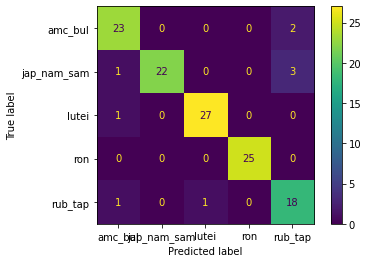

In [308]:
plot_confusion_matrix(grid, atributos_teste,classes_teste)

In [311]:
dump(grid, open('models/best_model_SVM_tuned_balance.pkl', 'wb'))

## <font color=green>4.4 Neural Networks (Deep Learning) </font>

### Manually set a neural network

In [312]:
dados_atributos = dados_balan.drop(columns=['Genomic group higher'])

In [313]:
print(dados_atributos.shape)
print(dados_classes.nunique())


(310, 7)
Genomic group higher    5
dtype: int64


In [316]:
labelencoder = LabelEncoder()

In [317]:
classe_num = labelencoder.fit_transform(dados_classes)
classe_dummy = utils.to_categorical(classe_num)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [318]:
def criarRede():
    classificador = Sequential()

    classificador.add(Dense(units=6, activation = 'relu',input_dim=7)) #1a camada oculta
    #adicionar dropout para primeira camada
    classificador.add(Dropout(0.2)) #20%
    
    classificador.add(Dense(units=6, activation = 'relu')) #2a camada oculta
    #adicionar dropout para primeira camada
    classificador.add(Dropout(0.2)) #20%
    
    classificador.add(Dense(units=5,activation='softmax')) #camada de saida
    classificador.compile(optimizer = 'adam', loss= 'categorical_crossentropy',metrics=['categorical_accuracy'])
    return classificador

In [319]:
classificador = KerasClassifier(build_fn = criarRede, epochs = 1000, batch_size = 10)

In [320]:
resultados = cross_val_score(estimator=classificador, X = dados_atributos, y = classe_num, cv = 10, scoring='accuracy')

Epoch 1/1000
28/28 [==============================] - 1s 2ms/step - loss: 1.6481 - categorical_accuracy: 0.1290
Epoch 2/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.6294 - categorical_accuracy: 0.1541
Epoch 3/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.6225 - categorical_accuracy: 0.1971
Epoch 4/1000
28/28 [==============================] - 0s 1ms/step - loss: 1.6118 - categorical_accuracy: 0.2186
Epoch 5/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.6087 - categorical_accuracy: 0.1685
Epoch 6/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.5994 - categorical_accuracy: 0.1900
Epoch 7/1000
28/28 [==============================] - 0s 1ms/step - loss: 1.5991 - categorical_accuracy: 0.1685
Epoch 8/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.5979 - categorical_accuracy: 0.2007
Epoch 9/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.5969 - categorical_accuracy:

28/28 [==============================] - 0s 2ms/step - loss: 1.0718 - categorical_accuracy: 0.5341
Epoch 74/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.0258 - categorical_accuracy: 0.5556
Epoch 75/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.0394 - categorical_accuracy: 0.5771
Epoch 76/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.0208 - categorical_accuracy: 0.5986
Epoch 77/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.0353 - categorical_accuracy: 0.5663
Epoch 78/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.0790 - categorical_accuracy: 0.5233
Epoch 79/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9719 - categorical_accuracy: 0.5986
Epoch 80/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9893 - categorical_accuracy: 0.6129
Epoch 81/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9977 - categorical_accuracy: 0.59

28/28 [==============================] - 0s 2ms/step - loss: 0.8268 - categorical_accuracy: 0.6452
Epoch 146/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9001 - categorical_accuracy: 0.6165
Epoch 147/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.9243 - categorical_accuracy: 0.6129
Epoch 148/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.8559 - categorical_accuracy: 0.6201
Epoch 149/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.9009 - categorical_accuracy: 0.5878
Epoch 150/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9033 - categorical_accuracy: 0.6022
Epoch 151/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9686 - categorical_accuracy: 0.5627
Epoch 152/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8785 - categorical_accuracy: 0.6272
Epoch 153/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9301 - categorical_accura

Epoch 217/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8255 - categorical_accuracy: 0.6272
Epoch 218/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8371 - categorical_accuracy: 0.6057
Epoch 219/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8860 - categorical_accuracy: 0.5842
Epoch 220/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9025 - categorical_accuracy: 0.6057
Epoch 221/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8192 - categorical_accuracy: 0.6595
Epoch 222/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8182 - categorical_accuracy: 0.6344
Epoch 223/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8652 - categorical_accuracy: 0.6129
Epoch 224/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8085 - categorical_accuracy: 0.6452
Epoch 225/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8513 - cat

28/28 [==============================] - 0s 2ms/step - loss: 0.8293 - categorical_accuracy: 0.6308
Epoch 289/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.7702 - categorical_accuracy: 0.6129
Epoch 290/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.9131 - categorical_accuracy: 0.5878
Epoch 291/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8231 - categorical_accuracy: 0.6057
Epoch 292/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8044 - categorical_accuracy: 0.6093
Epoch 293/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8083 - categorical_accuracy: 0.6344
Epoch 294/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8605 - categorical_accuracy: 0.6022
Epoch 295/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7934 - categorical_accuracy: 0.6129
Epoch 296/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8753 - categorical_accura

28/28 [==============================] - 0s 2ms/step - loss: 0.8069 - categorical_accuracy: 0.6308
Epoch 360/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9139 - categorical_accuracy: 0.6129
Epoch 361/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8100 - categorical_accuracy: 0.5986
Epoch 362/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7976 - categorical_accuracy: 0.6416
Epoch 363/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7811 - categorical_accuracy: 0.6559
Epoch 364/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8150 - categorical_accuracy: 0.6416
Epoch 365/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8464 - categorical_accuracy: 0.6022
Epoch 366/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7556 - categorical_accuracy: 0.6380
Epoch 367/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8677 - categorical_accura

Epoch 431/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.8583 - categorical_accuracy: 0.6093
Epoch 432/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8566 - categorical_accuracy: 0.5842
Epoch 433/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7803 - categorical_accuracy: 0.6416
Epoch 434/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8132 - categorical_accuracy: 0.6631
Epoch 435/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8409 - categorical_accuracy: 0.6201
Epoch 436/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8460 - categorical_accuracy: 0.6380
Epoch 437/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7812 - categorical_accuracy: 0.6129
Epoch 438/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7690 - categorical_accuracy: 0.6308
Epoch 439/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7562 - cat

28/28 [==============================] - 0s 2ms/step - loss: 0.8026 - categorical_accuracy: 0.6559
Epoch 503/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7344 - categorical_accuracy: 0.6559
Epoch 504/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8040 - categorical_accuracy: 0.6595
Epoch 505/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7988 - categorical_accuracy: 0.6631
Epoch 506/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8287 - categorical_accuracy: 0.6165
Epoch 507/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7223 - categorical_accuracy: 0.6667
Epoch 508/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8367 - categorical_accuracy: 0.5914
Epoch 509/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8433 - categorical_accuracy: 0.6523
Epoch 510/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8377 - categorical_accura

Epoch 574/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8383 - categorical_accuracy: 0.6416
Epoch 575/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7631 - categorical_accuracy: 0.6523
Epoch 576/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7764 - categorical_accuracy: 0.6595
Epoch 577/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7975 - categorical_accuracy: 0.6452
Epoch 578/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8250 - categorical_accuracy: 0.6129
Epoch 579/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7954 - categorical_accuracy: 0.6344
Epoch 580/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7757 - categorical_accuracy: 0.6774
Epoch 581/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7820 - categorical_accuracy: 0.6631
Epoch 582/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7940 - cat

28/28 [==============================] - 0s 2ms/step - loss: 0.7908 - categorical_accuracy: 0.6523
Epoch 646/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7659 - categorical_accuracy: 0.6774
Epoch 647/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8498 - categorical_accuracy: 0.6380
Epoch 648/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8108 - categorical_accuracy: 0.6559
Epoch 649/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7829 - categorical_accuracy: 0.6595
Epoch 650/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7904 - categorical_accuracy: 0.6559
Epoch 651/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7894 - categorical_accuracy: 0.6667
Epoch 652/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7410 - categorical_accuracy: 0.6523
Epoch 653/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7919 - categorical_accura

28/28 [==============================] - 0s 2ms/step - loss: 0.7470 - categorical_accuracy: 0.6774
Epoch 717/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7896 - categorical_accuracy: 0.6523
Epoch 718/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6896 - categorical_accuracy: 0.7025
Epoch 719/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8561 - categorical_accuracy: 0.6237
Epoch 720/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7735 - categorical_accuracy: 0.6738
Epoch 721/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8224 - categorical_accuracy: 0.6559
Epoch 722/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7542 - categorical_accuracy: 0.6380
Epoch 723/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7895 - categorical_accuracy: 0.6667
Epoch 724/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7974 - categorical_accura

Epoch 788/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7860 - categorical_accuracy: 0.7133
Epoch 789/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7604 - categorical_accuracy: 0.6882
Epoch 790/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7978 - categorical_accuracy: 0.6631
Epoch 791/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7578 - categorical_accuracy: 0.6810
Epoch 792/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7275 - categorical_accuracy: 0.6882
Epoch 793/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7115 - categorical_accuracy: 0.7025
Epoch 794/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7646 - categorical_accuracy: 0.6272
Epoch 795/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7987 - categorical_accuracy: 0.6703
Epoch 796/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7314 - cat

28/28 [==============================] - 0s 2ms/step - loss: 0.7995 - categorical_accuracy: 0.6201
Epoch 860/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8051 - categorical_accuracy: 0.6667
Epoch 861/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7866 - categorical_accuracy: 0.5986
Epoch 862/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8326 - categorical_accuracy: 0.6667
Epoch 863/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7694 - categorical_accuracy: 0.7204
Epoch 864/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7601 - categorical_accuracy: 0.6774
Epoch 865/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7731 - categorical_accuracy: 0.6918
Epoch 866/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7509 - categorical_accuracy: 0.7025
Epoch 867/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8094 - categorical_accura

Epoch 931/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7898 - categorical_accuracy: 0.6703
Epoch 932/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7967 - categorical_accuracy: 0.6344
Epoch 933/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7899 - categorical_accuracy: 0.6667
Epoch 934/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7928 - categorical_accuracy: 0.6272
Epoch 935/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7362 - categorical_accuracy: 0.6595
Epoch 936/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8097 - categorical_accuracy: 0.6523
Epoch 937/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8065 - categorical_accuracy: 0.6380
Epoch 938/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8088 - categorical_accuracy: 0.6667
Epoch 939/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8152 - cat

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/1000
28/28 [==============================] - 1s 2ms/step - loss: 1.6336 - categorical_accuracy: 0.2975
Epoch 2/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.5897 - categorical_accuracy: 0.3584
Epoch 3/1000
28/28 [==============================] - 0s 1ms/step - loss: 1.5750 - categorical_accuracy: 0.3728
Epoch 4/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.5371 - categorical_accuracy: 0.3835
Epoch 5/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.5325 - categorical_accuracy: 0.3907
Epoch 6/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.5100 - categorical_accuracy: 0.3907
Epoch 7/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.4947 - categorical_accuracy: 0.4050
Epoch 8/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.4845 - categorical_accuracy: 0.3907
Epoch 9/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.4883 - categorical_accuracy:

28/28 [==============================] - 0s 2ms/step - loss: 0.9014 - categorical_accuracy: 0.6022
Epoch 74/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9138 - categorical_accuracy: 0.5986
Epoch 75/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8745 - categorical_accuracy: 0.6201
Epoch 76/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9492 - categorical_accuracy: 0.5842
Epoch 77/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9340 - categorical_accuracy: 0.6057
Epoch 78/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9389 - categorical_accuracy: 0.5842
Epoch 79/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9544 - categorical_accuracy: 0.5986
Epoch 80/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9041 - categorical_accuracy: 0.6129
Epoch 81/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8761 - categorical_accuracy: 0.62

28/28 [==============================] - 0s 2ms/step - loss: 0.8072 - categorical_accuracy: 0.6703
Epoch 146/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8859 - categorical_accuracy: 0.6129
Epoch 147/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7867 - categorical_accuracy: 0.6559
Epoch 148/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8696 - categorical_accuracy: 0.6380
Epoch 149/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8216 - categorical_accuracy: 0.6523
Epoch 150/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8570 - categorical_accuracy: 0.6559
Epoch 151/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8175 - categorical_accuracy: 0.6667
Epoch 152/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8115 - categorical_accuracy: 0.6738
Epoch 153/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8681 - categorical_accura

28/28 [==============================] - 0s 2ms/step - loss: 0.7473 - categorical_accuracy: 0.6774
Epoch 217/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.7966 - categorical_accuracy: 0.6953
Epoch 218/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7652 - categorical_accuracy: 0.6953
Epoch 219/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8437 - categorical_accuracy: 0.6308
Epoch 220/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7569 - categorical_accuracy: 0.6846
Epoch 221/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7836 - categorical_accuracy: 0.6774
Epoch 222/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7868 - categorical_accuracy: 0.6667
Epoch 223/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7615 - categorical_accuracy: 0.6774
Epoch 224/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7209 - categorical_accura

28/28 [==============================] - 0s 2ms/step - loss: 0.7849 - categorical_accuracy: 0.6846
Epoch 288/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7435 - categorical_accuracy: 0.6918
Epoch 289/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7678 - categorical_accuracy: 0.6774
Epoch 290/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7449 - categorical_accuracy: 0.6703
Epoch 291/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7690 - categorical_accuracy: 0.6631
Epoch 292/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7643 - categorical_accuracy: 0.6989
Epoch 293/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7082 - categorical_accuracy: 0.6918
Epoch 294/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7648 - categorical_accuracy: 0.6774
Epoch 295/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7364 - categorical_accura

Epoch 359/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7657 - categorical_accuracy: 0.6810
Epoch 360/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7474 - categorical_accuracy: 0.6846
Epoch 361/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7412 - categorical_accuracy: 0.6810
Epoch 362/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6873 - categorical_accuracy: 0.7240
Epoch 363/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7283 - categorical_accuracy: 0.7133
Epoch 364/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7372 - categorical_accuracy: 0.6846
Epoch 365/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7746 - categorical_accuracy: 0.6953
Epoch 366/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6936 - categorical_accuracy: 0.7312
Epoch 367/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7504 - cat

28/28 [==============================] - 0s 2ms/step - loss: 0.7042 - categorical_accuracy: 0.7240
Epoch 431/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7701 - categorical_accuracy: 0.6918
Epoch 432/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7728 - categorical_accuracy: 0.6918
Epoch 433/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7041 - categorical_accuracy: 0.7276
Epoch 434/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7682 - categorical_accuracy: 0.7133
Epoch 435/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6567 - categorical_accuracy: 0.7276
Epoch 436/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6469 - categorical_accuracy: 0.7384
Epoch 437/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7377 - categorical_accuracy: 0.7133
Epoch 438/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7677 - categorical_accura

Epoch 502/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7153 - categorical_accuracy: 0.7384
Epoch 503/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7265 - categorical_accuracy: 0.7168
Epoch 504/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6845 - categorical_accuracy: 0.6989
Epoch 505/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6619 - categorical_accuracy: 0.7527
Epoch 506/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6737 - categorical_accuracy: 0.7168
Epoch 507/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6874 - categorical_accuracy: 0.7348
Epoch 508/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7341 - categorical_accuracy: 0.7025
Epoch 509/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6607 - categorical_accuracy: 0.7455
Epoch 510/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7839 - cat

28/28 [==============================] - 0s 2ms/step - loss: 0.7703 - categorical_accuracy: 0.6846
Epoch 574/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6968 - categorical_accuracy: 0.7204
Epoch 575/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7482 - categorical_accuracy: 0.6989
Epoch 576/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7654 - categorical_accuracy: 0.6882
Epoch 577/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6376 - categorical_accuracy: 0.7384
Epoch 578/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7864 - categorical_accuracy: 0.7025
Epoch 579/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6892 - categorical_accuracy: 0.7025
Epoch 580/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6974 - categorical_accuracy: 0.7133
Epoch 581/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6821 - categorical_accura

Epoch 645/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6939 - categorical_accuracy: 0.6953
Epoch 646/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6736 - categorical_accuracy: 0.7348
Epoch 647/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6994 - categorical_accuracy: 0.7240
Epoch 648/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6745 - categorical_accuracy: 0.7599
Epoch 649/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6899 - categorical_accuracy: 0.7168
Epoch 650/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7798 - categorical_accuracy: 0.6667
Epoch 651/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6571 - categorical_accuracy: 0.7742
Epoch 652/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6770 - categorical_accuracy: 0.7491
Epoch 653/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.6812 - cat

28/28 [==============================] - 0s 2ms/step - loss: 0.6345 - categorical_accuracy: 0.7276
Epoch 717/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6561 - categorical_accuracy: 0.7778
Epoch 718/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7038 - categorical_accuracy: 0.7276
Epoch 719/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6643 - categorical_accuracy: 0.7384
Epoch 720/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7082 - categorical_accuracy: 0.7133
Epoch 721/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6536 - categorical_accuracy: 0.7419
Epoch 722/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7000 - categorical_accuracy: 0.7348
Epoch 723/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7658 - categorical_accuracy: 0.6738
Epoch 724/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6938 - categorical_accura

Epoch 788/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6670 - categorical_accuracy: 0.7061
Epoch 789/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6970 - categorical_accuracy: 0.6918
Epoch 790/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6942 - categorical_accuracy: 0.7133
Epoch 791/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6850 - categorical_accuracy: 0.7240
Epoch 792/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7076 - categorical_accuracy: 0.7312
Epoch 793/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7173 - categorical_accuracy: 0.7025
Epoch 794/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6521 - categorical_accuracy: 0.7491
Epoch 795/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7322 - categorical_accuracy: 0.7276
Epoch 796/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7104 - cat

28/28 [==============================] - 0s 2ms/step - loss: 0.6147 - categorical_accuracy: 0.7563
Epoch 860/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7532 - categorical_accuracy: 0.7168
Epoch 861/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6877 - categorical_accuracy: 0.7312
Epoch 862/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6873 - categorical_accuracy: 0.7204
Epoch 863/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7320 - categorical_accuracy: 0.7025
Epoch 864/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7047 - categorical_accuracy: 0.7097
Epoch 865/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7159 - categorical_accuracy: 0.7133
Epoch 866/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6898 - categorical_accuracy: 0.7312
Epoch 867/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6721 - categorical_accura

Epoch 931/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7002 - categorical_accuracy: 0.7240
Epoch 932/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6944 - categorical_accuracy: 0.7312
Epoch 933/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6696 - categorical_accuracy: 0.7312
Epoch 934/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7450 - categorical_accuracy: 0.6918
Epoch 935/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7207 - categorical_accuracy: 0.7061
Epoch 936/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6813 - categorical_accuracy: 0.6989
Epoch 937/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6676 - categorical_accuracy: 0.7240
Epoch 938/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6857 - categorical_accuracy: 0.7240
Epoch 939/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7036 - cat

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/1000
28/28 [==============================] - 1s 2ms/step - loss: 1.5944 - categorical_accuracy: 0.2079
Epoch 2/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.5524 - categorical_accuracy: 0.2509
Epoch 3/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.5541 - categorical_accuracy: 0.2258
Epoch 4/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.5314 - categorical_accuracy: 0.2760
Epoch 5/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.5068 - categorical_accuracy: 0.3584
Epoch 6/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.5024 - categorical_accuracy: 0.4014
Epoch 7/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.4910 - categorical_accuracy: 0.3799
Epoch 8/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.4502 - categorical_accuracy: 0.3943
Epoch 9/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.4336 - categorical_accuracy:

28/28 [==============================] - 0s 2ms/step - loss: 0.9409 - categorical_accuracy: 0.5806
Epoch 74/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9821 - categorical_accuracy: 0.5699
Epoch 75/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.9877 - categorical_accuracy: 0.5591
Epoch 76/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9667 - categorical_accuracy: 0.5663
Epoch 77/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9792 - categorical_accuracy: 0.5556
Epoch 78/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9074 - categorical_accuracy: 0.6093
Epoch 79/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9908 - categorical_accuracy: 0.5520
Epoch 80/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9426 - categorical_accuracy: 0.5806
Epoch 81/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9181 - categorical_accuracy: 0.59

28/28 [==============================] - 0s 2ms/step - loss: 0.8295 - categorical_accuracy: 0.6703
Epoch 146/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7644 - categorical_accuracy: 0.7276
Epoch 147/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.7786 - categorical_accuracy: 0.7240
Epoch 148/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.7359 - categorical_accuracy: 0.7204
Epoch 149/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8174 - categorical_accuracy: 0.6846
Epoch 150/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7381 - categorical_accuracy: 0.7276
Epoch 151/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8216 - categorical_accuracy: 0.7025
Epoch 152/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7876 - categorical_accuracy: 0.6953
Epoch 153/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7362 - categorical_accura

Epoch 217/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7207 - categorical_accuracy: 0.7168
Epoch 218/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7012 - categorical_accuracy: 0.7312
Epoch 219/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6618 - categorical_accuracy: 0.7419
Epoch 220/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7260 - categorical_accuracy: 0.7025
Epoch 221/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6952 - categorical_accuracy: 0.7168
Epoch 222/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7339 - categorical_accuracy: 0.7025
Epoch 223/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8039 - categorical_accuracy: 0.6523
Epoch 224/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7208 - categorical_accuracy: 0.7276
Epoch 225/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6978 - cat

28/28 [==============================] - 0s 2ms/step - loss: 0.6747 - categorical_accuracy: 0.7168
Epoch 289/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6628 - categorical_accuracy: 0.7276
Epoch 290/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7735 - categorical_accuracy: 0.6953
Epoch 291/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6697 - categorical_accuracy: 0.7384
Epoch 292/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6915 - categorical_accuracy: 0.7312
Epoch 293/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7850 - categorical_accuracy: 0.6882
Epoch 294/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6492 - categorical_accuracy: 0.7384
Epoch 295/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6502 - categorical_accuracy: 0.7276
Epoch 296/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7568 - categorical_accura

Epoch 360/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6409 - categorical_accuracy: 0.7276
Epoch 361/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6867 - categorical_accuracy: 0.7455
Epoch 362/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7404 - categorical_accuracy: 0.7204
Epoch 363/1000
28/28 [==============================] - 0s 5ms/step - loss: 0.6474 - categorical_accuracy: 0.7348
Epoch 364/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.6865 - categorical_accuracy: 0.7348
Epoch 365/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.7249 - categorical_accuracy: 0.7025
Epoch 366/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.6708 - categorical_accuracy: 0.7240
Epoch 367/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7061 - categorical_accuracy: 0.7312
Epoch 368/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6603 - cat

28/28 [==============================] - 0s 2ms/step - loss: 0.6984 - categorical_accuracy: 0.7133
Epoch 432/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7390 - categorical_accuracy: 0.6918
Epoch 433/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.7330 - categorical_accuracy: 0.7025
Epoch 434/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6753 - categorical_accuracy: 0.7276
Epoch 435/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6347 - categorical_accuracy: 0.7348
Epoch 436/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7397 - categorical_accuracy: 0.6846
Epoch 437/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6234 - categorical_accuracy: 0.7491
Epoch 438/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6051 - categorical_accuracy: 0.7670
Epoch 439/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6454 - categorical_accura

28/28 [==============================] - 0s 2ms/step - loss: 0.6695 - categorical_accuracy: 0.7312
Epoch 503/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6527 - categorical_accuracy: 0.7348
Epoch 504/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5487 - categorical_accuracy: 0.7885
Epoch 505/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6504 - categorical_accuracy: 0.7419
Epoch 506/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6665 - categorical_accuracy: 0.7384
Epoch 507/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6759 - categorical_accuracy: 0.7348
Epoch 508/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7366 - categorical_accuracy: 0.6918
Epoch 509/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6996 - categorical_accuracy: 0.7204
Epoch 510/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.7156 - categorical_accura

Epoch 574/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6538 - categorical_accuracy: 0.7312
Epoch 575/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6601 - categorical_accuracy: 0.7348
Epoch 576/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6040 - categorical_accuracy: 0.7527
Epoch 577/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6782 - categorical_accuracy: 0.7348
Epoch 578/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.6720 - categorical_accuracy: 0.7348
Epoch 579/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.7333 - categorical_accuracy: 0.7168
Epoch 580/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6731 - categorical_accuracy: 0.7168
Epoch 581/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6312 - categorical_accuracy: 0.7419
Epoch 582/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6842 - cat

28/28 [==============================] - 0s 2ms/step - loss: 0.6118 - categorical_accuracy: 0.7599
Epoch 645/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6675 - categorical_accuracy: 0.7455
Epoch 646/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6813 - categorical_accuracy: 0.7419
Epoch 647/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6416 - categorical_accuracy: 0.7599
Epoch 648/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7059 - categorical_accuracy: 0.7491
Epoch 649/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7211 - categorical_accuracy: 0.7168
Epoch 650/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6701 - categorical_accuracy: 0.7419
Epoch 651/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5750 - categorical_accuracy: 0.7670
Epoch 652/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6331 - categorical_accura

Epoch 716/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6296 - categorical_accuracy: 0.7491
Epoch 717/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5943 - categorical_accuracy: 0.7706
Epoch 718/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7083 - categorical_accuracy: 0.7061
Epoch 719/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6467 - categorical_accuracy: 0.7276
Epoch 720/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6652 - categorical_accuracy: 0.7276
Epoch 721/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6862 - categorical_accuracy: 0.7384
Epoch 722/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6419 - categorical_accuracy: 0.7348
Epoch 723/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6622 - categorical_accuracy: 0.7455
Epoch 724/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6244 - cat

28/28 [==============================] - 0s 2ms/step - loss: 0.6099 - categorical_accuracy: 0.7634
Epoch 788/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6083 - categorical_accuracy: 0.7634
Epoch 789/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6158 - categorical_accuracy: 0.7491
Epoch 790/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5846 - categorical_accuracy: 0.7706
Epoch 791/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7011 - categorical_accuracy: 0.7384
Epoch 792/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6496 - categorical_accuracy: 0.7563
Epoch 793/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6080 - categorical_accuracy: 0.7455
Epoch 794/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6858 - categorical_accuracy: 0.7455
Epoch 795/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6466 - categorical_accura

Epoch 859/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.7188 - categorical_accuracy: 0.7491
Epoch 860/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6736 - categorical_accuracy: 0.7312
Epoch 861/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.7134 - categorical_accuracy: 0.7527
Epoch 862/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6476 - categorical_accuracy: 0.7670
Epoch 863/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5945 - categorical_accuracy: 0.7742
Epoch 864/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6534 - categorical_accuracy: 0.7778
Epoch 865/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6595 - categorical_accuracy: 0.7599
Epoch 866/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6317 - categorical_accuracy: 0.7491
Epoch 867/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.6092 - cat

28/28 [==============================] - 0s 2ms/step - loss: 0.5904 - categorical_accuracy: 0.7921
Epoch 931/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6396 - categorical_accuracy: 0.7563
Epoch 932/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6475 - categorical_accuracy: 0.7634
Epoch 933/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6073 - categorical_accuracy: 0.7634
Epoch 934/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6159 - categorical_accuracy: 0.7419
Epoch 935/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6758 - categorical_accuracy: 0.7384
Epoch 936/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6042 - categorical_accuracy: 0.7670
Epoch 937/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7007 - categorical_accuracy: 0.7491
Epoch 938/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.6256 - categorical_accura

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/1000
28/28 [==============================] - 1s 2ms/step - loss: 1.5568 - categorical_accuracy: 0.2366
Epoch 2/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.5362 - categorical_accuracy: 0.2366
Epoch 3/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.4921 - categorical_accuracy: 0.2796
Epoch 4/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.4653 - categorical_accuracy: 0.2724
Epoch 5/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.4327 - categorical_accuracy: 0.2832
Epoch 6/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.4034 - categorical_accuracy: 0.2832
Epoch 7/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.3924 - categorical_accuracy: 0.3082
Epoch 8/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.3588 - categorical_accuracy: 0.3333
Epoch 9/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.3399 - categorical_accuracy:

28/28 [==============================] - 0s 2ms/step - loss: 0.8528 - categorical_accuracy: 0.5771
Epoch 74/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8473 - categorical_accuracy: 0.5771
Epoch 75/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8691 - categorical_accuracy: 0.5914
Epoch 76/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8973 - categorical_accuracy: 0.5663
Epoch 77/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8485 - categorical_accuracy: 0.5986
Epoch 78/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8422 - categorical_accuracy: 0.6057
Epoch 79/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8360 - categorical_accuracy: 0.5878
Epoch 80/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8476 - categorical_accuracy: 0.5986
Epoch 81/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8376 - categorical_accuracy: 0.61

28/28 [==============================] - 0s 2ms/step - loss: 0.7320 - categorical_accuracy: 0.6631
Epoch 146/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8313 - categorical_accuracy: 0.6487
Epoch 147/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7251 - categorical_accuracy: 0.7061
Epoch 148/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8118 - categorical_accuracy: 0.6022
Epoch 149/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7820 - categorical_accuracy: 0.6272
Epoch 150/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8045 - categorical_accuracy: 0.5842
Epoch 151/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7702 - categorical_accuracy: 0.6416
Epoch 152/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8157 - categorical_accuracy: 0.6129
Epoch 153/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7593 - categorical_accura

Epoch 217/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7610 - categorical_accuracy: 0.6559
Epoch 218/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7470 - categorical_accuracy: 0.6272
Epoch 219/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7587 - categorical_accuracy: 0.6595
Epoch 220/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7803 - categorical_accuracy: 0.6667
Epoch 221/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7663 - categorical_accuracy: 0.6201
Epoch 222/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7735 - categorical_accuracy: 0.6129
Epoch 223/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7875 - categorical_accuracy: 0.6380
Epoch 224/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7952 - categorical_accuracy: 0.6344
Epoch 225/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7743 - cat

28/28 [==============================] - 0s 2ms/step - loss: 0.7342 - categorical_accuracy: 0.6523
Epoch 289/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6787 - categorical_accuracy: 0.6667
Epoch 290/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7201 - categorical_accuracy: 0.7097
Epoch 291/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7194 - categorical_accuracy: 0.6595
Epoch 292/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7573 - categorical_accuracy: 0.6631
Epoch 293/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7124 - categorical_accuracy: 0.6595
Epoch 294/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7497 - categorical_accuracy: 0.6631
Epoch 295/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7176 - categorical_accuracy: 0.6416
Epoch 296/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7190 - categorical_accura

Epoch 360/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6885 - categorical_accuracy: 0.6846
Epoch 361/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.7510 - categorical_accuracy: 0.6344
Epoch 362/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.7086 - categorical_accuracy: 0.6559
Epoch 363/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.6427 - categorical_accuracy: 0.7240
Epoch 364/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7187 - categorical_accuracy: 0.6487
Epoch 365/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7080 - categorical_accuracy: 0.6703
Epoch 366/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7095 - categorical_accuracy: 0.6774
Epoch 367/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7374 - categorical_accuracy: 0.6272
Epoch 368/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7115 - cat

28/28 [==============================] - 0s 2ms/step - loss: 0.6894 - categorical_accuracy: 0.6738
Epoch 432/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7376 - categorical_accuracy: 0.6882
Epoch 433/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6407 - categorical_accuracy: 0.7384
Epoch 434/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7046 - categorical_accuracy: 0.6846
Epoch 435/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7061 - categorical_accuracy: 0.6953
Epoch 436/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7275 - categorical_accuracy: 0.7133
Epoch 437/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.6739 - categorical_accuracy: 0.6703
Epoch 438/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.6731 - categorical_accuracy: 0.7025
Epoch 439/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6519 - categorical_accura

Epoch 503/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6301 - categorical_accuracy: 0.7455
Epoch 504/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.6596 - categorical_accuracy: 0.7133
Epoch 505/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.6810 - categorical_accuracy: 0.6846
Epoch 506/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6613 - categorical_accuracy: 0.7348
Epoch 507/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6368 - categorical_accuracy: 0.7419
Epoch 508/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.6929 - categorical_accuracy: 0.7133
Epoch 509/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.7602 - categorical_accuracy: 0.6631
Epoch 510/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6653 - categorical_accuracy: 0.7348
Epoch 511/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7129 - cat

28/28 [==============================] - 0s 2ms/step - loss: 0.7490 - categorical_accuracy: 0.6918
Epoch 575/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6579 - categorical_accuracy: 0.7276
Epoch 576/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6472 - categorical_accuracy: 0.6989
Epoch 577/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6702 - categorical_accuracy: 0.7025
Epoch 578/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6855 - categorical_accuracy: 0.7133
Epoch 579/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7048 - categorical_accuracy: 0.6846
Epoch 580/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6280 - categorical_accuracy: 0.7168
Epoch 581/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6949 - categorical_accuracy: 0.7097
Epoch 582/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7669 - categorical_accura

Epoch 646/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6207 - categorical_accuracy: 0.7276
Epoch 647/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7171 - categorical_accuracy: 0.6810
Epoch 648/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.6335 - categorical_accuracy: 0.7133
Epoch 649/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.6870 - categorical_accuracy: 0.7168
Epoch 650/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6833 - categorical_accuracy: 0.7133
Epoch 651/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6733 - categorical_accuracy: 0.6989
Epoch 652/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.6468 - categorical_accuracy: 0.7097
Epoch 653/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5811 - categorical_accuracy: 0.7599
Epoch 654/1000
28/28 [==============================] - 0s 10ms/step - loss: 0.6593 - ca

28/28 [==============================] - 0s 2ms/step - loss: 0.6579 - categorical_accuracy: 0.7168
Epoch 718/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6589 - categorical_accuracy: 0.6810
Epoch 719/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6929 - categorical_accuracy: 0.7204
Epoch 720/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6202 - categorical_accuracy: 0.7133
Epoch 721/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6701 - categorical_accuracy: 0.7025
Epoch 722/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6658 - categorical_accuracy: 0.6953
Epoch 723/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6971 - categorical_accuracy: 0.6810
Epoch 724/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6213 - categorical_accuracy: 0.7168
Epoch 725/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6005 - categorical_accura

Epoch 789/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6045 - categorical_accuracy: 0.7240
Epoch 790/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.6860 - categorical_accuracy: 0.6774
Epoch 791/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6479 - categorical_accuracy: 0.7240
Epoch 792/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6532 - categorical_accuracy: 0.7133
Epoch 793/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6185 - categorical_accuracy: 0.7599
Epoch 794/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.6698 - categorical_accuracy: 0.7097
Epoch 795/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5957 - categorical_accuracy: 0.7419
Epoch 796/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6359 - categorical_accuracy: 0.7384
Epoch 797/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6002 - cat

28/28 [==============================] - 0s 2ms/step - loss: 0.6379 - categorical_accuracy: 0.7312
Epoch 861/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6352 - categorical_accuracy: 0.6989
Epoch 862/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6063 - categorical_accuracy: 0.6953
Epoch 863/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6499 - categorical_accuracy: 0.7061
Epoch 864/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6255 - categorical_accuracy: 0.7455
Epoch 865/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7018 - categorical_accuracy: 0.7025
Epoch 866/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6588 - categorical_accuracy: 0.7276
Epoch 867/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6609 - categorical_accuracy: 0.6846
Epoch 868/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6247 - categorical_accura

Epoch 932/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5725 - categorical_accuracy: 0.7455
Epoch 933/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6083 - categorical_accuracy: 0.7276
Epoch 934/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6162 - categorical_accuracy: 0.7634
Epoch 935/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6011 - categorical_accuracy: 0.7384
Epoch 936/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6334 - categorical_accuracy: 0.7455
Epoch 937/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6542 - categorical_accuracy: 0.7025
Epoch 938/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5910 - categorical_accuracy: 0.7419
Epoch 939/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6184 - categorical_accuracy: 0.7455
Epoch 940/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6440 - cat

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/1000
28/28 [==============================] - 1s 2ms/step - loss: 1.6525 - categorical_accuracy: 0.1756 
Epoch 2/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.6151 - categorical_accuracy: 0.1685
Epoch 3/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.5873 - categorical_accuracy: 0.1971
Epoch 4/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.5714 - categorical_accuracy: 0.1864
Epoch 5/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.5581 - categorical_accuracy: 0.2079
Epoch 6/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.5367 - categorical_accuracy: 0.2545
Epoch 7/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.5158 - categorical_accuracy: 0.2688
Epoch 8/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.4984 - categorical_accuracy: 0.2366
Epoch 9/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.4779 - categorical_accuracy

28/28 [==============================] - 0s 2ms/step - loss: 0.8557 - categorical_accuracy: 0.6237
Epoch 74/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8922 - categorical_accuracy: 0.6093
Epoch 75/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8909 - categorical_accuracy: 0.6631
Epoch 76/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8360 - categorical_accuracy: 0.6559
Epoch 77/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8127 - categorical_accuracy: 0.6595
Epoch 78/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8540 - categorical_accuracy: 0.6380
Epoch 79/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8483 - categorical_accuracy: 0.6380
Epoch 80/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8647 - categorical_accuracy: 0.6057
Epoch 81/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8549 - categorical_accuracy: 0.65

28/28 [==============================] - 0s 2ms/step - loss: 0.7504 - categorical_accuracy: 0.6810
Epoch 146/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6807 - categorical_accuracy: 0.7168
Epoch 147/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7271 - categorical_accuracy: 0.6738
Epoch 148/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6666 - categorical_accuracy: 0.6918
Epoch 149/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7456 - categorical_accuracy: 0.6559
Epoch 150/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7406 - categorical_accuracy: 0.6559
Epoch 151/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7742 - categorical_accuracy: 0.6595
Epoch 152/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6738 - categorical_accuracy: 0.7276
Epoch 153/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7696 - categorical_accura

Epoch 217/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7343 - categorical_accuracy: 0.6631
Epoch 218/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6876 - categorical_accuracy: 0.7025
Epoch 219/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7428 - categorical_accuracy: 0.6631
Epoch 220/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6557 - categorical_accuracy: 0.7384
Epoch 221/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6572 - categorical_accuracy: 0.6953
Epoch 222/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6765 - categorical_accuracy: 0.6882
Epoch 223/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6652 - categorical_accuracy: 0.6810
Epoch 224/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6773 - categorical_accuracy: 0.6953
Epoch 225/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6575 - cat

28/28 [==============================] - 0s 2ms/step - loss: 0.6271 - categorical_accuracy: 0.7168
Epoch 288/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6243 - categorical_accuracy: 0.7312
Epoch 289/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6741 - categorical_accuracy: 0.6882
Epoch 290/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7221 - categorical_accuracy: 0.6846
Epoch 291/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6661 - categorical_accuracy: 0.7025
Epoch 292/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6203 - categorical_accuracy: 0.7348
Epoch 293/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6121 - categorical_accuracy: 0.7240
Epoch 294/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5990 - categorical_accuracy: 0.7348
Epoch 295/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6640 - categorical_accura

Epoch 359/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6302 - categorical_accuracy: 0.6918
Epoch 360/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6089 - categorical_accuracy: 0.7348
Epoch 361/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6171 - categorical_accuracy: 0.7384
Epoch 362/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6548 - categorical_accuracy: 0.7240
Epoch 363/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6366 - categorical_accuracy: 0.6989
Epoch 364/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6375 - categorical_accuracy: 0.6953
Epoch 365/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7181 - categorical_accuracy: 0.6882
Epoch 366/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6509 - categorical_accuracy: 0.6989
Epoch 367/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6410 - cat

28/28 [==============================] - 0s 2ms/step - loss: 0.6218 - categorical_accuracy: 0.7419
Epoch 431/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6959 - categorical_accuracy: 0.7097
Epoch 432/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6460 - categorical_accuracy: 0.7025
Epoch 433/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6426 - categorical_accuracy: 0.7276
Epoch 434/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6302 - categorical_accuracy: 0.7204
Epoch 435/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7094 - categorical_accuracy: 0.6703
Epoch 436/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5909 - categorical_accuracy: 0.7706
Epoch 437/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6446 - categorical_accuracy: 0.6882
Epoch 438/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6085 - categorical_accura

28/28 [==============================] - 0s 2ms/step - loss: 0.6523 - categorical_accuracy: 0.7240
Epoch 502/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6180 - categorical_accuracy: 0.7634
Epoch 503/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6497 - categorical_accuracy: 0.7133
Epoch 504/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6387 - categorical_accuracy: 0.7240
Epoch 505/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6760 - categorical_accuracy: 0.6882
Epoch 506/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6261 - categorical_accuracy: 0.7384
Epoch 507/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6633 - categorical_accuracy: 0.7097
Epoch 508/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5930 - categorical_accuracy: 0.7384
Epoch 509/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.6230 - categorical_accura

28/28 [==============================] - 0s 2ms/step - loss: 0.6224 - categorical_accuracy: 0.7599
Epoch 573/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6471 - categorical_accuracy: 0.7455
Epoch 574/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5793 - categorical_accuracy: 0.7097
Epoch 575/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5974 - categorical_accuracy: 0.7348
Epoch 576/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6161 - categorical_accuracy: 0.7133
Epoch 577/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6117 - categorical_accuracy: 0.7276
Epoch 578/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5666 - categorical_accuracy: 0.7312
Epoch 579/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5914 - categorical_accuracy: 0.7312
Epoch 580/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6349 - categorical_accura

Epoch 644/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6080 - categorical_accuracy: 0.7240
Epoch 645/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6026 - categorical_accuracy: 0.7419
Epoch 646/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5694 - categorical_accuracy: 0.7348
Epoch 647/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5698 - categorical_accuracy: 0.7419
Epoch 648/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6284 - categorical_accuracy: 0.7348
Epoch 649/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6195 - categorical_accuracy: 0.7276
Epoch 650/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6460 - categorical_accuracy: 0.7061
Epoch 651/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6048 - categorical_accuracy: 0.7348
Epoch 652/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5922 - cat

28/28 [==============================] - 0s 2ms/step - loss: 0.6338 - categorical_accuracy: 0.7133
Epoch 716/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5988 - categorical_accuracy: 0.7276
Epoch 717/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6132 - categorical_accuracy: 0.7312
Epoch 718/1000
28/28 [==============================] - ETA: 0s - loss: 0.6408 - categorical_accuracy: 0.70 - 0s 2ms/step - loss: 0.5614 - categorical_accuracy: 0.7240
Epoch 719/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6015 - categorical_accuracy: 0.7276
Epoch 720/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6090 - categorical_accuracy: 0.7168
Epoch 721/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6382 - categorical_accuracy: 0.7276
Epoch 722/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6286 - categorical_accuracy: 0.7240
Epoch 723/1000
28/28 [===========================

28/28 [==============================] - 0s 2ms/step - loss: 0.5702 - categorical_accuracy: 0.7742
Epoch 787/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6261 - categorical_accuracy: 0.7312
Epoch 788/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5778 - categorical_accuracy: 0.7455
Epoch 789/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5483 - categorical_accuracy: 0.7706
Epoch 790/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5916 - categorical_accuracy: 0.7455
Epoch 791/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6238 - categorical_accuracy: 0.7706
Epoch 792/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6659 - categorical_accuracy: 0.7204
Epoch 793/1000
28/28 [==============================] - ETA: 0s - loss: 0.5751 - categorical_accuracy: 0.71 - 0s 3ms/step - loss: 0.5968 - categorical_accuracy: 0.7025
Epoch 794/1000
28/28 [===========================

28/28 [==============================] - 0s 2ms/step - loss: 0.5976 - categorical_accuracy: 0.7634
Epoch 858/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5503 - categorical_accuracy: 0.7670
Epoch 859/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6201 - categorical_accuracy: 0.6989
Epoch 860/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6134 - categorical_accuracy: 0.7025
Epoch 861/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6270 - categorical_accuracy: 0.7384
Epoch 862/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5794 - categorical_accuracy: 0.7312
Epoch 863/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6337 - categorical_accuracy: 0.7312
Epoch 864/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6203 - categorical_accuracy: 0.7419
Epoch 865/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6624 - categorical_accura

Epoch 929/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6290 - categorical_accuracy: 0.7204
Epoch 930/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5832 - categorical_accuracy: 0.7455
Epoch 931/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6222 - categorical_accuracy: 0.7312
Epoch 932/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5570 - categorical_accuracy: 0.7634
Epoch 933/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6243 - categorical_accuracy: 0.7778
Epoch 934/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6011 - categorical_accuracy: 0.7491
Epoch 935/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6004 - categorical_accuracy: 0.7348
Epoch 936/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6436 - categorical_accuracy: 0.7348
Epoch 937/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6180 - cat

28/28 [==============================] - 0s 2ms/step - loss: 0.5955 - categorical_accuracy: 0.7348


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/1000
28/28 [==============================] - 1s 1ms/step - loss: 1.6060 - categorical_accuracy: 0.2222
Epoch 2/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.5863 - categorical_accuracy: 0.2616
Epoch 3/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.5736 - categorical_accuracy: 0.3262
Epoch 4/1000
28/28 [==============================] - 0s 1ms/step - loss: 1.5609 - categorical_accuracy: 0.3262
Epoch 5/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.5403 - categorical_accuracy: 0.3692
Epoch 6/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.5299 - categorical_accuracy: 0.3799
Epoch 7/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.5133 - categorical_accuracy: 0.4731
Epoch 8/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.4988 - categorical_accuracy: 0.4480
Epoch 9/1000
28/28 [==============================] - 0s 1ms/step - loss: 1.4708 - categorical_accuracy:

28/28 [==============================] - 0s 2ms/step - loss: 0.7936 - categorical_accuracy: 0.6631
Epoch 74/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7816 - categorical_accuracy: 0.6595
Epoch 75/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8372 - categorical_accuracy: 0.6308
Epoch 76/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7589 - categorical_accuracy: 0.6810
Epoch 77/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7800 - categorical_accuracy: 0.6667
Epoch 78/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7233 - categorical_accuracy: 0.7527
Epoch 79/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7292 - categorical_accuracy: 0.6738
Epoch 80/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7912 - categorical_accuracy: 0.6774
Epoch 81/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.7709 - categorical_accuracy: 0.68

28/28 [==============================] - 0s 2ms/step - loss: 0.6327 - categorical_accuracy: 0.7348
Epoch 145/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7684 - categorical_accuracy: 0.6774
Epoch 146/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6916 - categorical_accuracy: 0.7061
Epoch 147/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7335 - categorical_accuracy: 0.6953
Epoch 148/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6852 - categorical_accuracy: 0.7133
Epoch 149/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6719 - categorical_accuracy: 0.7168
Epoch 150/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7080 - categorical_accuracy: 0.6810
Epoch 151/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7150 - categorical_accuracy: 0.7204
Epoch 152/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7165 - categorical_accura

Epoch 216/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6454 - categorical_accuracy: 0.7563
Epoch 217/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.6781 - categorical_accuracy: 0.7384
Epoch 218/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6422 - categorical_accuracy: 0.7348
Epoch 219/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6926 - categorical_accuracy: 0.7097
Epoch 220/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6949 - categorical_accuracy: 0.7204
Epoch 221/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6693 - categorical_accuracy: 0.7419
Epoch 222/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.6311 - categorical_accuracy: 0.7706
Epoch 223/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6847 - categorical_accuracy: 0.7240
Epoch 224/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7282 - cat

28/28 [==============================] - 0s 2ms/step - loss: 0.6753 - categorical_accuracy: 0.7276
Epoch 288/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6414 - categorical_accuracy: 0.7419
Epoch 289/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6959 - categorical_accuracy: 0.7204
Epoch 290/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7012 - categorical_accuracy: 0.7348
Epoch 291/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6523 - categorical_accuracy: 0.7240
Epoch 292/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6584 - categorical_accuracy: 0.7491
Epoch 293/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6457 - categorical_accuracy: 0.7563
Epoch 294/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6279 - categorical_accuracy: 0.7312
Epoch 295/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7281 - categorical_accura

Epoch 359/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6808 - categorical_accuracy: 0.6882
Epoch 360/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6115 - categorical_accuracy: 0.7563
Epoch 361/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7010 - categorical_accuracy: 0.7240
Epoch 362/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5826 - categorical_accuracy: 0.7706
Epoch 363/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6692 - categorical_accuracy: 0.7276
Epoch 364/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6106 - categorical_accuracy: 0.7634
Epoch 365/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.6878 - categorical_accuracy: 0.7491
Epoch 366/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7231 - categorical_accuracy: 0.6810
Epoch 367/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6263 - cat

28/28 [==============================] - 0s 2ms/step - loss: 0.6179 - categorical_accuracy: 0.7527
Epoch 431/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6347 - categorical_accuracy: 0.7527
Epoch 432/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6472 - categorical_accuracy: 0.7419
Epoch 433/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6742 - categorical_accuracy: 0.7133
Epoch 434/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6577 - categorical_accuracy: 0.7455
Epoch 435/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6713 - categorical_accuracy: 0.7133
Epoch 436/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6738 - categorical_accuracy: 0.7204
Epoch 437/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6742 - categorical_accuracy: 0.7455
Epoch 438/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6146 - categorical_accura

Epoch 502/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5919 - categorical_accuracy: 0.7670
Epoch 503/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6951 - categorical_accuracy: 0.6989
Epoch 504/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7114 - categorical_accuracy: 0.7348
Epoch 505/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6228 - categorical_accuracy: 0.7384
Epoch 506/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6060 - categorical_accuracy: 0.7670
Epoch 507/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5464 - categorical_accuracy: 0.7993
Epoch 508/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6303 - categorical_accuracy: 0.7527
Epoch 509/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6175 - categorical_accuracy: 0.7527
Epoch 510/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6181 - cat

28/28 [==============================] - 0s 2ms/step - loss: 0.6324 - categorical_accuracy: 0.7599
Epoch 574/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6623 - categorical_accuracy: 0.7419
Epoch 575/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6782 - categorical_accuracy: 0.7348
Epoch 576/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6355 - categorical_accuracy: 0.7670
Epoch 577/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6821 - categorical_accuracy: 0.7455
Epoch 578/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6723 - categorical_accuracy: 0.7419
Epoch 579/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5953 - categorical_accuracy: 0.7742
Epoch 580/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6432 - categorical_accuracy: 0.7419
Epoch 581/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6133 - categorical_accura

Epoch 645/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6241 - categorical_accuracy: 0.7491
Epoch 646/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6522 - categorical_accuracy: 0.7527
Epoch 647/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6181 - categorical_accuracy: 0.7706
Epoch 648/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7260 - categorical_accuracy: 0.7133
Epoch 649/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6834 - categorical_accuracy: 0.7599
Epoch 650/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6666 - categorical_accuracy: 0.7276
Epoch 651/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6813 - categorical_accuracy: 0.7419
Epoch 652/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6170 - categorical_accuracy: 0.7455
Epoch 653/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6376 - cat

28/28 [==============================] - 0s 2ms/step - loss: 0.6087 - categorical_accuracy: 0.7634
Epoch 717/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6136 - categorical_accuracy: 0.7634
Epoch 718/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6473 - categorical_accuracy: 0.7527
Epoch 719/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6139 - categorical_accuracy: 0.7670
Epoch 720/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6063 - categorical_accuracy: 0.7599
Epoch 721/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6635 - categorical_accuracy: 0.7419
Epoch 722/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6252 - categorical_accuracy: 0.7563
Epoch 723/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6173 - categorical_accuracy: 0.7706
Epoch 724/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6027 - categorical_accura

Epoch 788/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6356 - categorical_accuracy: 0.7348
Epoch 789/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6520 - categorical_accuracy: 0.7634
Epoch 790/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5938 - categorical_accuracy: 0.7742
Epoch 791/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5984 - categorical_accuracy: 0.7921
Epoch 792/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6569 - categorical_accuracy: 0.7384
Epoch 793/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6320 - categorical_accuracy: 0.7634
Epoch 794/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.5833 - categorical_accuracy: 0.8029
Epoch 795/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6338 - categorical_accuracy: 0.7599
Epoch 796/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5792 - cat

28/28 [==============================] - 0s 2ms/step - loss: 0.5569 - categorical_accuracy: 0.7849
Epoch 860/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6163 - categorical_accuracy: 0.7419
Epoch 861/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5974 - categorical_accuracy: 0.7957
Epoch 862/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5794 - categorical_accuracy: 0.7814
Epoch 863/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6340 - categorical_accuracy: 0.7455
Epoch 864/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5846 - categorical_accuracy: 0.7849
Epoch 865/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6309 - categorical_accuracy: 0.7312
Epoch 866/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6824 - categorical_accuracy: 0.7168
Epoch 867/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6363 - categorical_accura

Epoch 931/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6572 - categorical_accuracy: 0.7419
Epoch 932/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6445 - categorical_accuracy: 0.7599
Epoch 933/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5837 - categorical_accuracy: 0.7849
Epoch 934/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6677 - categorical_accuracy: 0.7491
Epoch 935/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5769 - categorical_accuracy: 0.7599
Epoch 936/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5601 - categorical_accuracy: 0.7814
Epoch 937/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.5918 - categorical_accuracy: 0.7778
Epoch 938/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.5700 - categorical_accuracy: 0.8208
Epoch 939/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6064 - cat

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/1000
28/28 [==============================] - 1s 1ms/step - loss: 1.6303 - categorical_accuracy: 0.2724
Epoch 2/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.6099 - categorical_accuracy: 0.2832
Epoch 3/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.5989 - categorical_accuracy: 0.2545
Epoch 4/1000
28/28 [==============================] - 0s 1ms/step - loss: 1.5815 - categorical_accuracy: 0.2366
Epoch 5/1000
28/28 [==============================] - 0s 1ms/step - loss: 1.5624 - categorical_accuracy: 0.2473
Epoch 6/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.5470 - categorical_accuracy: 0.2616
Epoch 7/1000
28/28 [==============================] - 0s 1ms/step - loss: 1.5326 - categorical_accuracy: 0.2581
Epoch 8/1000
28/28 [==============================] - 0s 1ms/step - loss: 1.5239 - categorical_accuracy: 0.2545
Epoch 9/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.4870 - categorical_accuracy:

28/28 [==============================] - 0s 2ms/step - loss: 0.9945 - categorical_accuracy: 0.5305
Epoch 74/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.0127 - categorical_accuracy: 0.4910
Epoch 75/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9803 - categorical_accuracy: 0.5448
Epoch 76/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9939 - categorical_accuracy: 0.5520
Epoch 77/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.0226 - categorical_accuracy: 0.5412
Epoch 78/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9762 - categorical_accuracy: 0.5233
Epoch 79/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9845 - categorical_accuracy: 0.5484
Epoch 80/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9557 - categorical_accuracy: 0.5914
Epoch 81/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9903 - categorical_accuracy: 0.56

28/28 [==============================] - 0s 2ms/step - loss: 0.8904 - categorical_accuracy: 0.5842
Epoch 145/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8205 - categorical_accuracy: 0.6380
Epoch 146/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8684 - categorical_accuracy: 0.6416
Epoch 147/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8478 - categorical_accuracy: 0.6703
Epoch 148/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8447 - categorical_accuracy: 0.6057
Epoch 149/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8460 - categorical_accuracy: 0.6523
Epoch 150/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8401 - categorical_accuracy: 0.6559
Epoch 151/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8698 - categorical_accuracy: 0.6129
Epoch 152/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8245 - categorical_accura

28/28 [==============================] - 0s 2ms/step - loss: 0.7908 - categorical_accuracy: 0.7097
Epoch 216/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8808 - categorical_accuracy: 0.6272
Epoch 217/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8857 - categorical_accuracy: 0.6057
Epoch 218/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7560 - categorical_accuracy: 0.6774
Epoch 219/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8520 - categorical_accuracy: 0.6559
Epoch 220/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8495 - categorical_accuracy: 0.6380
Epoch 221/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8499 - categorical_accuracy: 0.6093
Epoch 222/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8246 - categorical_accuracy: 0.6344
Epoch 223/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8270 - categorical_accura

Epoch 287/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7978 - categorical_accuracy: 0.6989
Epoch 288/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8123 - categorical_accuracy: 0.6380
Epoch 289/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7659 - categorical_accuracy: 0.6774
Epoch 290/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7921 - categorical_accuracy: 0.6559
Epoch 291/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7896 - categorical_accuracy: 0.6559
Epoch 292/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7543 - categorical_accuracy: 0.7061
Epoch 293/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8515 - categorical_accuracy: 0.6703
Epoch 294/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.7915 - categorical_accuracy: 0.6523
Epoch 295/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7880 - cat

28/28 [==============================] - 0s 2ms/step - loss: 0.7458 - categorical_accuracy: 0.6810
Epoch 359/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7392 - categorical_accuracy: 0.6774
Epoch 360/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7815 - categorical_accuracy: 0.6882
Epoch 361/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8108 - categorical_accuracy: 0.6810
Epoch 362/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7280 - categorical_accuracy: 0.7025
Epoch 363/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8380 - categorical_accuracy: 0.6344
Epoch 364/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7171 - categorical_accuracy: 0.7025
Epoch 365/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7954 - categorical_accuracy: 0.6882
Epoch 366/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7602 - categorical_accura

Epoch 430/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7753 - categorical_accuracy: 0.6487
Epoch 431/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.7593 - categorical_accuracy: 0.6846
Epoch 432/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7988 - categorical_accuracy: 0.6703
Epoch 433/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8631 - categorical_accuracy: 0.6380
Epoch 434/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7341 - categorical_accuracy: 0.7061
Epoch 435/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7616 - categorical_accuracy: 0.6774
Epoch 436/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7792 - categorical_accuracy: 0.6738
Epoch 437/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7519 - categorical_accuracy: 0.7061
Epoch 438/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7282 - cat

28/28 [==============================] - 0s 1ms/step - loss: 0.7230 - categorical_accuracy: 0.6846
Epoch 502/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.7200 - categorical_accuracy: 0.7133
Epoch 503/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.7705 - categorical_accuracy: 0.6774
Epoch 504/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7065 - categorical_accuracy: 0.6989
Epoch 505/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6783 - categorical_accuracy: 0.7348
Epoch 506/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.7788 - categorical_accuracy: 0.6667
Epoch 507/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.7409 - categorical_accuracy: 0.6989
Epoch 508/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7370 - categorical_accuracy: 0.7025
Epoch 509/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.7886 - categorical_accura

Epoch 573/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7102 - categorical_accuracy: 0.7276
Epoch 574/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7756 - categorical_accuracy: 0.6810
Epoch 575/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8096 - categorical_accuracy: 0.6774
Epoch 576/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7516 - categorical_accuracy: 0.7097
Epoch 577/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7838 - categorical_accuracy: 0.6989
Epoch 578/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6794 - categorical_accuracy: 0.7204
Epoch 579/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7233 - categorical_accuracy: 0.6846
Epoch 580/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7273 - categorical_accuracy: 0.7133
Epoch 581/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7499 - cat

28/28 [==============================] - 0s 2ms/step - loss: 0.7806 - categorical_accuracy: 0.6703
Epoch 645/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7514 - categorical_accuracy: 0.6989
Epoch 646/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7478 - categorical_accuracy: 0.6774
Epoch 647/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7642 - categorical_accuracy: 0.6846
Epoch 648/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7766 - categorical_accuracy: 0.6559
Epoch 649/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7359 - categorical_accuracy: 0.6918
Epoch 650/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7400 - categorical_accuracy: 0.6810
Epoch 651/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7071 - categorical_accuracy: 0.7204
Epoch 652/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7826 - categorical_accura

28/28 [==============================] - 0s 2ms/step - loss: 0.7231 - categorical_accuracy: 0.6738
Epoch 716/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7085 - categorical_accuracy: 0.6918
Epoch 717/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7478 - categorical_accuracy: 0.6953
Epoch 718/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7429 - categorical_accuracy: 0.7097
Epoch 719/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7284 - categorical_accuracy: 0.6738
Epoch 720/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6927 - categorical_accuracy: 0.7419
Epoch 721/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7889 - categorical_accuracy: 0.6774
Epoch 722/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7469 - categorical_accuracy: 0.6882
Epoch 723/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6918 - categorical_accura

Epoch 787/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7116 - categorical_accuracy: 0.7204
Epoch 788/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6756 - categorical_accuracy: 0.7527
Epoch 789/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7644 - categorical_accuracy: 0.7025
Epoch 790/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7706 - categorical_accuracy: 0.6810
Epoch 791/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7727 - categorical_accuracy: 0.6989
Epoch 792/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7308 - categorical_accuracy: 0.6989
Epoch 793/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7409 - categorical_accuracy: 0.7097
Epoch 794/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6975 - categorical_accuracy: 0.6882
Epoch 795/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7278 - cat

28/28 [==============================] - 0s 2ms/step - loss: 0.7641 - categorical_accuracy: 0.6846
Epoch 859/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6690 - categorical_accuracy: 0.7133
Epoch 860/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6827 - categorical_accuracy: 0.7312
Epoch 861/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6909 - categorical_accuracy: 0.6989
Epoch 862/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7141 - categorical_accuracy: 0.6882
Epoch 863/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7403 - categorical_accuracy: 0.6846
Epoch 864/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6639 - categorical_accuracy: 0.7312
Epoch 865/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7635 - categorical_accuracy: 0.6667
Epoch 866/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7038 - categorical_accura

Epoch 930/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7311 - categorical_accuracy: 0.7025
Epoch 931/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7674 - categorical_accuracy: 0.6595
Epoch 932/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7309 - categorical_accuracy: 0.6953
Epoch 933/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7728 - categorical_accuracy: 0.6774
Epoch 934/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7580 - categorical_accuracy: 0.6918
Epoch 935/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7768 - categorical_accuracy: 0.6559
Epoch 936/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7201 - categorical_accuracy: 0.7240
Epoch 937/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6933 - categorical_accuracy: 0.7384
Epoch 938/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6759 - cat

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/1000
28/28 [==============================] - 1s 2ms/step - loss: 1.6106 - categorical_accuracy: 0.2079 
Epoch 2/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.6028 - categorical_accuracy: 0.2545
Epoch 3/1000
28/28 [==============================] - 0s 3ms/step - loss: 1.5978 - categorical_accuracy: 0.2330
Epoch 4/1000
28/28 [==============================] - 0s 3ms/step - loss: 1.5933 - categorical_accuracy: 0.2473
Epoch 5/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.5849 - categorical_accuracy: 0.2867
Epoch 6/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.5797 - categorical_accuracy: 0.3190
Epoch 7/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.5691 - categorical_accuracy: 0.3226
Epoch 8/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.5647 - categorical_accuracy: 0.3118
Epoch 9/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.5541 - categorical_accuracy

28/28 [==============================] - 0s 2ms/step - loss: 1.1367 - categorical_accuracy: 0.4588
Epoch 74/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.0894 - categorical_accuracy: 0.4839
Epoch 75/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.0302 - categorical_accuracy: 0.5341
Epoch 76/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.0563 - categorical_accuracy: 0.5161
Epoch 77/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.1192 - categorical_accuracy: 0.5161
Epoch 78/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.0290 - categorical_accuracy: 0.5484
Epoch 79/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.0125 - categorical_accuracy: 0.5233
Epoch 80/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.0507 - categorical_accuracy: 0.5054
Epoch 81/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.0098 - categorical_accuracy: 0.53

28/28 [==============================] - 0s 2ms/step - loss: 0.8928 - categorical_accuracy: 0.5986
Epoch 145/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9395 - categorical_accuracy: 0.5663
Epoch 146/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8906 - categorical_accuracy: 0.5735
Epoch 147/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.0050 - categorical_accuracy: 0.5412
Epoch 148/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.0204 - categorical_accuracy: 0.5305
Epoch 149/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8924 - categorical_accuracy: 0.6272
Epoch 150/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9245 - categorical_accuracy: 0.5735
Epoch 151/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9571 - categorical_accuracy: 0.5448
Epoch 152/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9515 - categorical_accura

Epoch 216/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8950 - categorical_accuracy: 0.5914
Epoch 217/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8880 - categorical_accuracy: 0.6022
Epoch 218/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9224 - categorical_accuracy: 0.6057
Epoch 219/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8859 - categorical_accuracy: 0.5771
Epoch 220/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.0389 - categorical_accuracy: 0.5448
Epoch 221/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8953 - categorical_accuracy: 0.6201
Epoch 222/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8538 - categorical_accuracy: 0.6201
Epoch 223/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8452 - categorical_accuracy: 0.6308
Epoch 224/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9449 - cat

28/28 [==============================] - 0s 2ms/step - loss: 0.8715 - categorical_accuracy: 0.5556
Epoch 288/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8980 - categorical_accuracy: 0.5771
Epoch 289/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9085 - categorical_accuracy: 0.5591
Epoch 290/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8641 - categorical_accuracy: 0.6057
Epoch 291/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8690 - categorical_accuracy: 0.6344
Epoch 292/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8329 - categorical_accuracy: 0.6416
Epoch 293/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9525 - categorical_accuracy: 0.6022
Epoch 294/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8086 - categorical_accuracy: 0.6523
Epoch 295/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8653 - categorical_accura

Epoch 359/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8174 - categorical_accuracy: 0.6452
Epoch 360/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8740 - categorical_accuracy: 0.6344
Epoch 361/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8982 - categorical_accuracy: 0.6057
Epoch 362/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8722 - categorical_accuracy: 0.6237
Epoch 363/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8995 - categorical_accuracy: 0.6129
Epoch 364/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7865 - categorical_accuracy: 0.6595
Epoch 365/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8753 - categorical_accuracy: 0.5914
Epoch 366/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9124 - categorical_accuracy: 0.5914
Epoch 367/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8882 - cat

28/28 [==============================] - 0s 2ms/step - loss: 0.8531 - categorical_accuracy: 0.6057
Epoch 431/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8803 - categorical_accuracy: 0.6201
Epoch 432/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9172 - categorical_accuracy: 0.5878
Epoch 433/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8490 - categorical_accuracy: 0.6201
Epoch 434/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8183 - categorical_accuracy: 0.6308
Epoch 435/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8859 - categorical_accuracy: 0.6093
Epoch 436/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8558 - categorical_accuracy: 0.6201
Epoch 437/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8136 - categorical_accuracy: 0.6129
Epoch 438/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8689 - categorical_accura

Epoch 502/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9151 - categorical_accuracy: 0.6201
Epoch 503/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8707 - categorical_accuracy: 0.6201
Epoch 504/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8490 - categorical_accuracy: 0.6308
Epoch 505/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9234 - categorical_accuracy: 0.6022
Epoch 506/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9094 - categorical_accuracy: 0.5771
Epoch 507/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8475 - categorical_accuracy: 0.6093
Epoch 508/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8735 - categorical_accuracy: 0.6237
Epoch 509/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8897 - categorical_accuracy: 0.5663
Epoch 510/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8502 - cat

28/28 [==============================] - 0s 2ms/step - loss: 0.8069 - categorical_accuracy: 0.6703
Epoch 574/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9303 - categorical_accuracy: 0.5986
Epoch 575/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.8981 - categorical_accuracy: 0.6093
Epoch 576/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8909 - categorical_accuracy: 0.6093
Epoch 577/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8534 - categorical_accuracy: 0.6129
Epoch 578/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8547 - categorical_accuracy: 0.5914
Epoch 579/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9005 - categorical_accuracy: 0.6165
Epoch 580/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8210 - categorical_accuracy: 0.6308
Epoch 581/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8636 - categorical_accura

Epoch 645/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8298 - categorical_accuracy: 0.6022
Epoch 646/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8123 - categorical_accuracy: 0.6487
Epoch 647/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8869 - categorical_accuracy: 0.5878
Epoch 648/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9291 - categorical_accuracy: 0.5986
Epoch 649/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8699 - categorical_accuracy: 0.6272
Epoch 650/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8250 - categorical_accuracy: 0.6380
Epoch 651/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8962 - categorical_accuracy: 0.6201
Epoch 652/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8712 - categorical_accuracy: 0.6344
Epoch 653/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.8515 - cat

28/28 [==============================] - 0s 2ms/step - loss: 0.8273 - categorical_accuracy: 0.6416
Epoch 717/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8484 - categorical_accuracy: 0.6272
Epoch 718/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8471 - categorical_accuracy: 0.6165
Epoch 719/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8287 - categorical_accuracy: 0.5878
Epoch 720/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8137 - categorical_accuracy: 0.6559
Epoch 721/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8231 - categorical_accuracy: 0.6308
Epoch 722/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8503 - categorical_accuracy: 0.6165
Epoch 723/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8559 - categorical_accuracy: 0.6380
Epoch 724/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8154 - categorical_accura

Epoch 788/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8184 - categorical_accuracy: 0.6308
Epoch 789/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8817 - categorical_accuracy: 0.6237
Epoch 790/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8140 - categorical_accuracy: 0.6416
Epoch 791/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8259 - categorical_accuracy: 0.6738
Epoch 792/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8136 - categorical_accuracy: 0.6452
Epoch 793/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8286 - categorical_accuracy: 0.6523
Epoch 794/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8730 - categorical_accuracy: 0.5878
Epoch 795/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8578 - categorical_accuracy: 0.6237
Epoch 796/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8197 - cat

28/28 [==============================] - 0s 2ms/step - loss: 0.7890 - categorical_accuracy: 0.6559
Epoch 860/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8256 - categorical_accuracy: 0.6093
Epoch 861/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7589 - categorical_accuracy: 0.6918
Epoch 862/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7782 - categorical_accuracy: 0.6559
Epoch 863/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7372 - categorical_accuracy: 0.6487
Epoch 864/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9088 - categorical_accuracy: 0.6165
Epoch 865/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8724 - categorical_accuracy: 0.6237
Epoch 866/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8566 - categorical_accuracy: 0.5986
Epoch 867/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8674 - categorical_accura

Epoch 931/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9191 - categorical_accuracy: 0.5735
Epoch 932/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8867 - categorical_accuracy: 0.6237
Epoch 933/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8085 - categorical_accuracy: 0.6452
Epoch 934/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8170 - categorical_accuracy: 0.6452
Epoch 935/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8614 - categorical_accuracy: 0.5986
Epoch 936/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8635 - categorical_accuracy: 0.5806
Epoch 937/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8557 - categorical_accuracy: 0.5986
Epoch 938/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8355 - categorical_accuracy: 0.6416
Epoch 939/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8337 - cat

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/1000
28/28 [==============================] - 1s 1ms/step - loss: 1.5955 - categorical_accuracy: 0.2222
Epoch 2/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.5776 - categorical_accuracy: 0.2437
Epoch 3/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.5458 - categorical_accuracy: 0.2294
Epoch 4/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.5353 - categorical_accuracy: 0.2509
Epoch 5/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.4965 - categorical_accuracy: 0.2796
Epoch 6/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.5044 - categorical_accuracy: 0.2796
Epoch 7/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.4817 - categorical_accuracy: 0.3297
Epoch 8/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.4973 - categorical_accuracy: 0.2867
Epoch 9/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.4600 - categorical_accuracy:

28/28 [==============================] - 0s 2ms/step - loss: 0.9549 - categorical_accuracy: 0.5663
Epoch 74/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9615 - categorical_accuracy: 0.6022
Epoch 75/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9458 - categorical_accuracy: 0.6057
Epoch 76/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9375 - categorical_accuracy: 0.5950
Epoch 77/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9411 - categorical_accuracy: 0.6165
Epoch 78/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9205 - categorical_accuracy: 0.6093
Epoch 79/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9367 - categorical_accuracy: 0.5484
Epoch 80/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9516 - categorical_accuracy: 0.5771
Epoch 81/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9447 - categorical_accuracy: 0.59

28/28 [==============================] - 0s 1ms/step - loss: 0.8527 - categorical_accuracy: 0.6093
Epoch 146/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.8758 - categorical_accuracy: 0.6416
Epoch 147/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.9069 - categorical_accuracy: 0.6201
Epoch 148/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.9025 - categorical_accuracy: 0.6093
Epoch 149/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.9210 - categorical_accuracy: 0.6165
Epoch 150/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.8510 - categorical_accuracy: 0.6487
Epoch 151/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.8836 - categorical_accuracy: 0.6559
Epoch 152/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.8786 - categorical_accuracy: 0.6523
Epoch 153/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.8893 - categorical_accura

Epoch 217/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.9092 - categorical_accuracy: 0.6452
Epoch 218/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8453 - categorical_accuracy: 0.6416
Epoch 219/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8320 - categorical_accuracy: 0.6774
Epoch 220/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8829 - categorical_accuracy: 0.6523
Epoch 221/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8290 - categorical_accuracy: 0.6953
Epoch 222/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8505 - categorical_accuracy: 0.6631
Epoch 223/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7751 - categorical_accuracy: 0.6738
Epoch 224/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8158 - categorical_accuracy: 0.6559
Epoch 225/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8279 - cat

28/28 [==============================] - 0s 2ms/step - loss: 0.8274 - categorical_accuracy: 0.6595
Epoch 289/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7805 - categorical_accuracy: 0.6882
Epoch 290/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8142 - categorical_accuracy: 0.6595
Epoch 291/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.8286 - categorical_accuracy: 0.6487
Epoch 292/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8323 - categorical_accuracy: 0.6738
Epoch 293/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8369 - categorical_accuracy: 0.6559
Epoch 294/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8172 - categorical_accuracy: 0.6631
Epoch 295/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8535 - categorical_accuracy: 0.6380
Epoch 296/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7791 - categorical_accura

28/28 [==============================] - 0s 2ms/step - loss: 0.8191 - categorical_accuracy: 0.6667
Epoch 360/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8553 - categorical_accuracy: 0.6523
Epoch 361/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7928 - categorical_accuracy: 0.6595
Epoch 362/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8416 - categorical_accuracy: 0.6667
Epoch 363/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7868 - categorical_accuracy: 0.6595
Epoch 364/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7350 - categorical_accuracy: 0.7025
Epoch 365/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7975 - categorical_accuracy: 0.6595
Epoch 366/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7302 - categorical_accuracy: 0.6846
Epoch 367/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8027 - categorical_accura

Epoch 431/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7745 - categorical_accuracy: 0.6631
Epoch 432/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7821 - categorical_accuracy: 0.6846
Epoch 433/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8736 - categorical_accuracy: 0.6344
Epoch 434/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7639 - categorical_accuracy: 0.7061
Epoch 435/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7655 - categorical_accuracy: 0.6882
Epoch 436/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7239 - categorical_accuracy: 0.7025
Epoch 437/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7443 - categorical_accuracy: 0.6989
Epoch 438/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7608 - categorical_accuracy: 0.6846
Epoch 439/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8055 - cat

28/28 [==============================] - 0s 2ms/step - loss: 0.8255 - categorical_accuracy: 0.7025
Epoch 503/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8031 - categorical_accuracy: 0.6595
Epoch 504/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7473 - categorical_accuracy: 0.6882
Epoch 505/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8595 - categorical_accuracy: 0.6703
Epoch 506/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7681 - categorical_accuracy: 0.7025
Epoch 507/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7621 - categorical_accuracy: 0.6738
Epoch 508/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7905 - categorical_accuracy: 0.6989
Epoch 509/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7787 - categorical_accuracy: 0.6846
Epoch 510/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7522 - categorical_accura

28/28 [==============================] - 0s 2ms/step - loss: 0.8405 - categorical_accuracy: 0.6738
Epoch 574/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8062 - categorical_accuracy: 0.6810
Epoch 575/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7207 - categorical_accuracy: 0.6810
Epoch 576/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7493 - categorical_accuracy: 0.7025
Epoch 577/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7654 - categorical_accuracy: 0.6989
Epoch 578/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7020 - categorical_accuracy: 0.7097
Epoch 579/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7571 - categorical_accuracy: 0.6953
Epoch 580/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7546 - categorical_accuracy: 0.6810
Epoch 581/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7807 - categorical_accura

28/28 [==============================] - 0s 2ms/step - loss: 0.8099 - categorical_accuracy: 0.6703
Epoch 645/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7850 - categorical_accuracy: 0.6882
Epoch 646/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7400 - categorical_accuracy: 0.6738
Epoch 647/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7899 - categorical_accuracy: 0.6738
Epoch 648/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7244 - categorical_accuracy: 0.7097
Epoch 649/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7295 - categorical_accuracy: 0.7097
Epoch 650/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6898 - categorical_accuracy: 0.7204
Epoch 651/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6882 - categorical_accuracy: 0.7168
Epoch 652/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7428 - categorical_accura

Epoch 716/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7591 - categorical_accuracy: 0.6810
Epoch 717/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7002 - categorical_accuracy: 0.7133
Epoch 718/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7398 - categorical_accuracy: 0.6774
Epoch 719/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7072 - categorical_accuracy: 0.6810
Epoch 720/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7405 - categorical_accuracy: 0.7061
Epoch 721/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6869 - categorical_accuracy: 0.7204
Epoch 722/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7376 - categorical_accuracy: 0.6953
Epoch 723/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7259 - categorical_accuracy: 0.6846
Epoch 724/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7636 - cat

28/28 [==============================] - 0s 2ms/step - loss: 0.8047 - categorical_accuracy: 0.6953
Epoch 788/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6913 - categorical_accuracy: 0.7168
Epoch 789/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7813 - categorical_accuracy: 0.6810
Epoch 790/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7479 - categorical_accuracy: 0.7097
Epoch 791/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7325 - categorical_accuracy: 0.7061
Epoch 792/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7619 - categorical_accuracy: 0.6953
Epoch 793/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7193 - categorical_accuracy: 0.7168
Epoch 794/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7029 - categorical_accuracy: 0.6918
Epoch 795/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6897 - categorical_accura

Epoch 859/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.7697 - categorical_accuracy: 0.6989
Epoch 860/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7529 - categorical_accuracy: 0.6595
Epoch 861/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7396 - categorical_accuracy: 0.6989
Epoch 862/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7277 - categorical_accuracy: 0.6918
Epoch 863/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8019 - categorical_accuracy: 0.6595
Epoch 864/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6838 - categorical_accuracy: 0.7025
Epoch 865/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6709 - categorical_accuracy: 0.7168
Epoch 866/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7364 - categorical_accuracy: 0.7061
Epoch 867/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7148 - cat

28/28 [==============================] - 0s 2ms/step - loss: 0.7924 - categorical_accuracy: 0.6774
Epoch 931/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7499 - categorical_accuracy: 0.6882
Epoch 932/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6825 - categorical_accuracy: 0.7240
Epoch 933/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7459 - categorical_accuracy: 0.7061
Epoch 934/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7703 - categorical_accuracy: 0.6774
Epoch 935/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6841 - categorical_accuracy: 0.7025
Epoch 936/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7445 - categorical_accuracy: 0.6953
Epoch 937/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6372 - categorical_accuracy: 0.7419
Epoch 938/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6802 - categorical_accura

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/1000
28/28 [==============================] - 1s 1ms/step - loss: 1.6779 - categorical_accuracy: 0.2222
Epoch 2/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.6009 - categorical_accuracy: 0.2473
Epoch 3/1000
28/28 [==============================] - 0s 1ms/step - loss: 1.5672 - categorical_accuracy: 0.2401
Epoch 4/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.5390 - categorical_accuracy: 0.2186
Epoch 5/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.5258 - categorical_accuracy: 0.2151
Epoch 6/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.5062 - categorical_accuracy: 0.2366
Epoch 7/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.4837 - categorical_accuracy: 0.3190
Epoch 8/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.4650 - categorical_accuracy: 0.3297
Epoch 9/1000
28/28 [==============================] - 0s 2ms/step - loss: 1.4805 - categorical_accuracy:

28/28 [==============================] - 0s 2ms/step - loss: 0.8141 - categorical_accuracy: 0.6487
Epoch 74/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7791 - categorical_accuracy: 0.6953
Epoch 75/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7822 - categorical_accuracy: 0.7061
Epoch 76/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7851 - categorical_accuracy: 0.6810
Epoch 77/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7716 - categorical_accuracy: 0.6918
Epoch 78/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8322 - categorical_accuracy: 0.6559
Epoch 79/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.8468 - categorical_accuracy: 0.6487
Epoch 80/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7221 - categorical_accuracy: 0.7133
Epoch 81/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7205 - categorical_accuracy: 0.70

28/28 [==============================] - 0s 2ms/step - loss: 0.7148 - categorical_accuracy: 0.7097
Epoch 146/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7222 - categorical_accuracy: 0.7061
Epoch 147/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7422 - categorical_accuracy: 0.6989
Epoch 148/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7420 - categorical_accuracy: 0.7097
Epoch 149/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6588 - categorical_accuracy: 0.7527
Epoch 150/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6447 - categorical_accuracy: 0.7312
Epoch 151/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6571 - categorical_accuracy: 0.7133
Epoch 152/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7404 - categorical_accuracy: 0.6810
Epoch 153/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6605 - categorical_accura

Epoch 217/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6687 - categorical_accuracy: 0.7312
Epoch 218/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7628 - categorical_accuracy: 0.6631
Epoch 219/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5721 - categorical_accuracy: 0.7634
Epoch 220/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6433 - categorical_accuracy: 0.7348
Epoch 221/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5661 - categorical_accuracy: 0.7778
Epoch 222/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7330 - categorical_accuracy: 0.6989
Epoch 223/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6449 - categorical_accuracy: 0.7384
Epoch 224/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6854 - categorical_accuracy: 0.7276
Epoch 225/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6621 - cat

28/28 [==============================] - 0s 2ms/step - loss: 0.6685 - categorical_accuracy: 0.7419
Epoch 289/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6297 - categorical_accuracy: 0.7133
Epoch 290/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6489 - categorical_accuracy: 0.7276
Epoch 291/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6838 - categorical_accuracy: 0.7419
Epoch 292/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5932 - categorical_accuracy: 0.7670
Epoch 293/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5709 - categorical_accuracy: 0.7742
Epoch 294/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6100 - categorical_accuracy: 0.7706
Epoch 295/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6517 - categorical_accuracy: 0.7634
Epoch 296/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5925 - categorical_accura

28/28 [==============================] - 0s 2ms/step - loss: 0.6477 - categorical_accuracy: 0.7742
Epoch 360/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6611 - categorical_accuracy: 0.7670
Epoch 361/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6655 - categorical_accuracy: 0.7455
Epoch 362/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6829 - categorical_accuracy: 0.7563
Epoch 363/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6266 - categorical_accuracy: 0.7634
Epoch 364/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6646 - categorical_accuracy: 0.7384
Epoch 365/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7183 - categorical_accuracy: 0.7563
Epoch 366/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6874 - categorical_accuracy: 0.7491
Epoch 367/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6473 - categorical_accura

Epoch 431/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5916 - categorical_accuracy: 0.7778
Epoch 432/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5734 - categorical_accuracy: 0.7921
Epoch 433/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5783 - categorical_accuracy: 0.7670
Epoch 434/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6291 - categorical_accuracy: 0.7993
Epoch 435/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6319 - categorical_accuracy: 0.7634
Epoch 436/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5736 - categorical_accuracy: 0.7742
Epoch 437/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6101 - categorical_accuracy: 0.7670
Epoch 438/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5871 - categorical_accuracy: 0.7527
Epoch 439/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5844 - cat

28/28 [==============================] - 0s 2ms/step - loss: 0.5752 - categorical_accuracy: 0.7563
Epoch 503/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5855 - categorical_accuracy: 0.7455
Epoch 504/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6788 - categorical_accuracy: 0.7527
Epoch 505/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5687 - categorical_accuracy: 0.7742
Epoch 506/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6251 - categorical_accuracy: 0.7527
Epoch 507/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5426 - categorical_accuracy: 0.7921
Epoch 508/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6436 - categorical_accuracy: 0.7742
Epoch 509/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.7277 - categorical_accuracy: 0.7348
Epoch 510/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5836 - categorical_accura

Epoch 574/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5632 - categorical_accuracy: 0.7814
Epoch 575/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6623 - categorical_accuracy: 0.7742
Epoch 576/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6201 - categorical_accuracy: 0.7670
Epoch 577/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5942 - categorical_accuracy: 0.7670
Epoch 578/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5974 - categorical_accuracy: 0.8100
Epoch 579/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5781 - categorical_accuracy: 0.7706
Epoch 580/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5490 - categorical_accuracy: 0.7957
Epoch 581/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5337 - categorical_accuracy: 0.8029
Epoch 582/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5658 - cat

28/28 [==============================] - 0s 2ms/step - loss: 0.5975 - categorical_accuracy: 0.7670
Epoch 646/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5811 - categorical_accuracy: 0.7957
Epoch 647/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6407 - categorical_accuracy: 0.7527
Epoch 648/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5607 - categorical_accuracy: 0.7706
Epoch 649/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6491 - categorical_accuracy: 0.7240
Epoch 650/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6825 - categorical_accuracy: 0.7276
Epoch 651/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5861 - categorical_accuracy: 0.7993
Epoch 652/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5651 - categorical_accuracy: 0.7849
Epoch 653/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5648 - categorical_accura

Epoch 717/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6396 - categorical_accuracy: 0.7670
Epoch 718/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6771 - categorical_accuracy: 0.7599
Epoch 719/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6349 - categorical_accuracy: 0.7599
Epoch 720/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6468 - categorical_accuracy: 0.7670
Epoch 721/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5998 - categorical_accuracy: 0.7885
Epoch 722/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5825 - categorical_accuracy: 0.7670
Epoch 723/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5687 - categorical_accuracy: 0.7957
Epoch 724/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5686 - categorical_accuracy: 0.7993
Epoch 725/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6049 - cat

28/28 [==============================] - 0s 2ms/step - loss: 0.5322 - categorical_accuracy: 0.7885
Epoch 789/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6131 - categorical_accuracy: 0.7670
Epoch 790/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6219 - categorical_accuracy: 0.7778
Epoch 791/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5678 - categorical_accuracy: 0.7957
Epoch 792/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5367 - categorical_accuracy: 0.8065
Epoch 793/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5786 - categorical_accuracy: 0.8065
Epoch 794/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5748 - categorical_accuracy: 0.7885
Epoch 795/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5453 - categorical_accuracy: 0.7921
Epoch 796/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6514 - categorical_accura

Epoch 860/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.5681 - categorical_accuracy: 0.7742
Epoch 861/1000
28/28 [==============================] - 0s 1ms/step - loss: 0.5511 - categorical_accuracy: 0.7634
Epoch 862/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6044 - categorical_accuracy: 0.7885
Epoch 863/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5912 - categorical_accuracy: 0.7563
Epoch 864/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5218 - categorical_accuracy: 0.7993
Epoch 865/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5268 - categorical_accuracy: 0.7742
Epoch 866/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5780 - categorical_accuracy: 0.7921
Epoch 867/1000
28/28 [==============================] - ETA: 0s - loss: 0.8138 - categorical_accuracy: 0.60 - 0s 2ms/step - loss: 0.6720 - categorical_accuracy: 0.7706
Epoch 868/1000
28/28 [============

28/28 [==============================] - 0s 2ms/step - loss: 0.5143 - categorical_accuracy: 0.8029
Epoch 931/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5999 - categorical_accuracy: 0.7742
Epoch 932/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6014 - categorical_accuracy: 0.7670
Epoch 933/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5208 - categorical_accuracy: 0.7993
Epoch 934/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5501 - categorical_accuracy: 0.7849
Epoch 935/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5478 - categorical_accuracy: 0.7993
Epoch 936/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6098 - categorical_accuracy: 0.7921
Epoch 937/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5707 - categorical_accuracy: 0.7849
Epoch 938/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5678 - categorical_accura

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



In [321]:
for i in range(len(resultados)):
    print(f'Cross{i+1}: {resultados[i]}')

Cross1: 0.45161290322580644
Cross2: 0.7741935483870968
Cross3: 0.25806451612903225
Cross4: 0.8064516129032258
Cross5: 0.7096774193548387
Cross6: 0.9354838709677419
Cross7: 0.8709677419354839
Cross8: 1.0
Cross9: 1.0
Cross10: 0.5483870967741935


In [322]:
print(resultados.mean())
print(resultados.std())

0.735483870967742
0.23430993286883714


primeiro:
Cross1: 0.7419354838709677
Cross2: 0.8387096774193549
Cross3: 0.2903225806451613
Cross4: 0.7741935483870968
Cross5: 0.6451612903225806
Cross6: 0.9354838709677419
Cross7: 0.8064516129032258
Cross8: 0.967741935483871
Cross9: 1.0
Cross10: 0.5161290322580645


** This is quite good but not as good as our SVM with balanced dataset. Neural networks require a lot of data and our dataset is quite limited. I'd guess it is not the best tool for our problem **
___

** save model **

In [323]:
dump(classificador, open('models/neural_network.pkl', 'wb'))

### Automate Neural Network

> This is only an experiment, I don't have the knowledge or experience to do this properly. Results were poor with 10 trials and incresing this number takes tike to finish analyses. If end up running this with more trials and get interesting results, please contact me: nnbuainain@gmail.com

In [324]:
# import autosklearn
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from autosklearn.classification import AutoSklearnClassifier
# from autosklearn.experimental.askl2 import AutoSklearn2Classifier
# import autosklearn.classification
# import sklearn.model_selection
# import sklearn.datasets
# import sklearn.metrics

# import autokeras as ak
# import tensorflow as tf
# import skopt

In [330]:
# clf = ak.StructuredDataClassifier(max_trials=10,loss='categorical_crossentropy')

In [ ]:
# clf.fit(atributos_treino,np.ravel(classes_treino))

Trial 1 Complete [00h 08m 41s]
val_accuracy: 0.7307692170143127

Best val_accuracy So Far: 0.8846153616905212
Total elapsed time: 00h 08m 41s
Epoch 1/259
6/6 [==============================] - 1s 3ms/step - loss: 1.5921 - accuracy: 0.2204
Epoch 2/259
6/6 [==============================] - 0s 3ms/step - loss: 1.3997 - accuracy: 0.5968
Epoch 3/259
6/6 [==============================] - 0s 2ms/step - loss: 1.2357 - accuracy: 0.6989
Epoch 4/259
6/6 [==============================] - 0s 2ms/step - loss: 1.0911 - accuracy: 0.7419
Epoch 5/259
6/6 [==============================] - 0s 3ms/step - loss: 0.9645 - accuracy: 0.7527
Epoch 6/259
6/6 [==============================] - 0s 2ms/step - loss: 0.8582 - accuracy: 0.7903
Epoch 7/259
6/6 [==============================] - 0s 2ms/step - loss: 0.7723 - accuracy: 0.8280
Epoch 8/259
6/6 [==============================] - 0s 2ms/step - loss: 0.7043 - accuracy: 0.8333
Epoch 9/259
6/6 [==============================] - 0s 2ms/step - loss: 0.6511 - ac

6/6 [==============================] - 0s 3ms/step - loss: 0.2307 - accuracy: 0.9140
Epoch 84/259
6/6 [==============================] - 0s 4ms/step - loss: 0.2291 - accuracy: 0.9194
Epoch 85/259
6/6 [==============================] - 0s 4ms/step - loss: 0.2275 - accuracy: 0.9194
Epoch 86/259
6/6 [==============================] - 0s 3ms/step - loss: 0.2260 - accuracy: 0.9194
Epoch 87/259
6/6 [==============================] - 0s 3ms/step - loss: 0.2244 - accuracy: 0.9194
Epoch 88/259
6/6 [==============================] - 0s 3ms/step - loss: 0.2229 - accuracy: 0.9194
Epoch 89/259
6/6 [==============================] - 0s 2ms/step - loss: 0.2214 - accuracy: 0.9194
Epoch 90/259
6/6 [==============================] - 0s 2ms/step - loss: 0.2200 - accuracy: 0.9194
Epoch 91/259
6/6 [==============================] - 0s 3ms/step - loss: 0.2185 - accuracy: 0.9194
Epoch 92/259
6/6 [==============================] - 0s 4ms/step - loss: 0.2171 - accuracy: 0.9247
Epoch 93/259
6/6 [===============

6/6 [==============================] - 0s 3ms/step - loss: 0.1517 - accuracy: 0.9462
Epoch 167/259
6/6 [==============================] - 0s 3ms/step - loss: 0.1511 - accuracy: 0.9462
Epoch 168/259
6/6 [==============================] - 0s 3ms/step - loss: 0.1505 - accuracy: 0.9462
Epoch 169/259
6/6 [==============================] - 0s 2ms/step - loss: 0.1500 - accuracy: 0.9462
Epoch 170/259
6/6 [==============================] - 0s 3ms/step - loss: 0.1494 - accuracy: 0.9462
Epoch 171/259
6/6 [==============================] - 0s 3ms/step - loss: 0.1488 - accuracy: 0.9516
Epoch 172/259
6/6 [==============================] - 0s 4ms/step - loss: 0.1482 - accuracy: 0.9516
Epoch 173/259
6/6 [==============================] - 0s 3ms/step - loss: 0.1476 - accuracy: 0.9516
Epoch 174/259
6/6 [==============================] - 0s 3ms/step - loss: 0.1471 - accuracy: 0.9516
Epoch 175/259
6/6 [==============================] - 0s 3ms/step - loss: 0.1466 - accuracy: 0.9516
Epoch 176/259
6/6 [=====

6/6 [==============================] - 0s 2ms/step - loss: 0.1147 - accuracy: 0.9624
Epoch 249/259
6/6 [==============================] - 0s 2ms/step - loss: 0.1145 - accuracy: 0.9570
Epoch 250/259
6/6 [==============================] - 0s 2ms/step - loss: 0.1141 - accuracy: 0.9624
Epoch 251/259
6/6 [==============================] - 0s 2ms/step - loss: 0.1137 - accuracy: 0.9624
Epoch 252/259
6/6 [==============================] - 0s 3ms/step - loss: 0.1133 - accuracy: 0.9677
Epoch 253/259
6/6 [==============================] - 0s 3ms/step - loss: 0.1130 - accuracy: 0.9570
Epoch 254/259
6/6 [==============================] - 0s 2ms/step - loss: 0.1127 - accuracy: 0.9624
Epoch 255/259
6/6 [==============================] - 0s 3ms/step - loss: 0.1122 - accuracy: 0.9624
Epoch 256/259
6/6 [==============================] - 0s 3ms/step - loss: 0.1119 - accuracy: 0.9624
Epoch 257/259
6/6 [==============================] - 0s 3ms/step - loss: 0.1116 - accuracy: 0.9624
Epoch 258/259
6/6 [=====

In [ ]:
# predicted_y = clf.predict(atributos_teste)

In [ ]:
# print(clf.evaluate(atributos_teste, np.ravel(classes_teste)))

# <font color=green>4 Conclusions </font>

Efficiency of methods:

* Cluster methods were not very efficient to discriminate the refined or superior genomic groups.

* PCA showed the first evidence that various genomic groups could be differentiated through singing.

* The classification models were the most effective in differentiating the different genomic groups. Among them, the SVM model with balanced variables was the best model with an accuracy of 0.92.

* In general, it was not possible to differentiate the more refined genomic groups. This was somewhat expected, as genomic differentiation usually appears first, followed later by phenotypic differentiations such as plumage color and song. There may not simply be differences among some groups

* The model's performance in identifying the higher hierarquical genomic groups was very satisfactory, as it surpassed the experts' (myself, NB) ability to differentiate the song of these groups. The algorithm was able to go beyond conventional human hearing by finding more patterns in the data. In addition to the three groups (ron, lutei and others) that were already initially distinguishable by the specialists, the model was able to classify with high accuracy most other groups, with the classification errors being related to the groups whose singing was in fact very much similar.

**BIOLOGICAL IMPORTANCE**

The results obtained here have several theoretical and practical applications.

**1) Taxonomic importance:** It has been shown that several groups can be distinguished by their songs, and this has an impact on the area known as taxonomy, which aims to describe and classify organisms. In general, species are "recognized" when they can be differentiated. Once recognized, species are treated differently, bringing consequences to all of the following areas of biology. For example, when delimiting a conservation areas, the ones that have a greater number of species are generally chosen and, therefore, the ideal is that the knowledge on what and where are these species, be as refined as possible. Here we demonstrate that several of the *Tunchiornis* genomic clusters perhaps "deserve" the species level.

**2) Identification of the geographical origin of animals apprehended in trafficking:** When an animal is apprehended, normally the final goal is to return the animal to the wild. For this purpose, the geographic area of release should ideally be the same as the origin to ensure that the individual is returned to his natural area. It would be possible to do this with DNA analysis, however, given that groups can be differentiated by song, a much faster, cheaper and more viable alternative would be to record the individual's song and use the model created here to classify the individual into population of origin, in order to optimize chances of survivor.

**3) Application for identifying bird species:** Bird watching is a way of contemplating nature that is becoming more and more popular around the world, and attracts thousands of tourists from many different countries, especially to the neotropical region. Many are amateurs and need help to identify the species, especially in places with extremely high diversity like Brazil. The model created here could be extrapolated, and trained with a large volume of data to identify any Brazilian bird species. In an ideal scenario, the user could record an individual singing with their cell phone directly on the App, and the App would return the identification of their species.

**4) Extrapolation of models to other animal groups:** Several other animal use sound to communicate, including whales, monkeys, lizards, frogs, etc... In this way, most likely, this same model can be replicated to other organisms, having essentially the same utilities and applications mentioned above.